## Problem Statement
 

### A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.
Dataset Description
 



### Variables

#### Description
 - Second mortgage	Households with a second mortgage statistics
 - Home equity	Households with a home equity loan statistics
 - Debt	Households with any type of debt statistics
 - Mortgage Costs	Statistics regarding mortgage payments, home equity loans, utilities, and property taxes
 - Home Owner Costs	Sum of utilities, and property taxes statistics
 - Gross Rent	Contract rent plus the estimated average monthly cost of utility features
 - High school Graduation	High school graduation statistics
 - Population Demographics	Population demographics statistics
 - Age Demographics	Age demographic statistics
 - Household Income	Total income of people residing in the household
 - Family Income	Total income of people related to the householder

## Project Task: Week 1

### Data Import and Preparation:

1. Import data.
2. Figure out the primary key and look for the requirement of indexing.
3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

### Exploratory Data Analysis (EDA):

    4.Perform debt analysis. You may take the following steps:

 a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage c) Create pie charts to show overall debt and bad debt

d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

e) Create a collated income distribution chart for family income, house hold income, and remaining income

 

## Project Task: Week 2
### Exploratory Data Analysis (EDA):

1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

    a) Use pop and ALand variables to create a new field called population density

    b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type

2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

    a) Analyze the married, separated, and divorced population for these population brackets

    b) Visualize using appropriate chart type

3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.


## Project Task: Week 3
### Data Pre-processing:

1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

# Project Task: Week 4

## Data Modeling :

1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

    a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

    b) Run another model at State level. There are 52 states in USA.

    c) Keep below considerations while building a linear regression model. Data Modeling :

• Variables should have significant impact on predicting Monthly mortgage and owner costs

• Utilize all predictor variable to start with initial hypothesis

• R square of 60 percent and above should be achieved

• Ensure Multi-collinearity does not exist in dependent variables

• Test if predicted variable is normally distributed


## Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a) Box plot of distribution of average rent by type of place (village, urban, town, etc.).

    b) Pie charts to show overall debt and bad debt.

    c) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

    d) Heat map for correlation matrix.

    e) Pie chart to show the population distribution across different types of places (village, urban, town etc.)

Download the data sets from here .

In [1]:
import numpy as np

In [2]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df_train=pd.read_csv(r"A:\CapstoneProject1\Project_1\train.csv")
df_test=pd.read_csv(r"A:\CapstoneProject1\Project_1\test.csv")

In [3]:
df_train.head(5)

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type primary  zip_code  area_code        lat  \
0    Hamilton        Hamilton   City   tract     13346        315  42.840812   
1  South Bend        Roseland   City   tract     46616        574  41.701441   
2    Danville        Danville   City   tract     46122        317  39.792202   
3    San Juan        Guaynabo  Urban   tract       927        787  18.396103   
4   Manhattan  Manhattan City   City   tract     66502        785  39.195573   

         lng        ALand   AWater   pop  male_pop  female_pop  rent_mean  \
0 -75.501524  202183361.0  1699120  5230      2612        2618  769.38638   
1 -86.266614    1560828.0   100363  2633      1349        1284  804.87924   
2 -86.515246   69561595.0   284193  6881      3643        3238  742.77365   
3 -66.104169    1105793.0        0  2700      1141        1559  803.42018   
4 -96.569366    2554403.0        0  5637      2586        3051  938.56493   

   rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
0        784.0   232.63967           272.34441         362.0     0.86761   
1        848.0   253.46747           312.58622         513.0     0.97410   
2        703.0   323.39011           291.85520         378.0     0.95238   
3        782.0   297.39258           259.30316         368.0     0.94693   
4        881.0   392.44096          1005.42886        1704.0     0.99286   

   rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
0     0.79155     0.59155     0.45634     0.42817     0.18592     0.15493   
1     0.93227     0.69920     0.69920     0.55179     0.41235     0.39044   
2     0.88624     0.79630     0.66667     0.39153     0.39153     0.28307   
3     0.87151     0.69832     0.61732     0.51397     0.46927     0.35754   
4     0.98247     0.91688     0.84740     0.78247     0.60974     0.55455   

   rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
0     0.12958               387           355  63125.28406    48120.0   
1     0.27888               542           502  41931.92593    35186.0   
2     0.15873               459           378  84942.68317    74964.0   
3     0.32961               438           358  48733.67116    37845.0   
4     0.44416              1725          1540  31834.15466    22497.0   

      hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
0  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
1  31639.50203         838.74664      1127.0  50670.10337        43023.0   
2  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
3  45100.54010         928.32193      1267.0  56401.68133        44399.0   
4  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

   family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
0   47667.30119             884.33516          1491.0        1414.80295   
1   34715.57548             375.28798           554.0         864.41390   
2   49292.67664             709.74925          1889.0        1506.06758   
3   41082.90515             490.18479           729.0        1175.28642   
4   39609.12605             244.08903           395.0        1192.58759   

   hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
0              1223.0          641.22898                  377.83135   
1               784.0          482.27020                  316.88320   
2              1361.0          731.89394                  699.41354   
3              1101.0          428.98751                  261.28471   
4

In [4]:
df_train.shape

(27321, 80)

In [5]:
df_test.shape

(11709, 80)

## 2. Figure out the primary key and look for the requirement of indexing.

In [6]:
df_train['UID'].unique().shape

(27161,)

In [7]:
df_train['UID'].value_counts().sort_values(ascending = False).head(10)

282028    4
230058    4
247777    3
264375    3
225628    3
272055    3
238947    3
239416    3
236972    3
267087    3
Name: UID, dtype: int64

In [8]:
#UID is unique userID value in the train and test dataset. So an index can be created using this column
df_train.set_index(keys=['UID'],inplace=True)# Set UID to be the primary key
df_test.set_index(keys=['UID'],inplace=True)

In [9]:
df_train.head(2)

BLOCKID  SUMLEVEL  COUNTYID  STATEID     state state_ab        city  \
UID                                                                           
267822      NaN       140        53       36  New York       NY    Hamilton   
246444      NaN       140       141       18   Indiana       IN  South Bend   

           place  type primary  zip_code  area_code        lat        lng  \
UID                                                                         
267822  Hamilton  City   tract     13346        315  42.840812 -75.501524   
246444  Roseland  City   tract     46616        574  41.701441 -86.266614   

              ALand   AWater   pop  male_pop  female_pop  rent_mean  \
UID                                                                   
267822  202183361.0  1699120  5230      2612        2618  769.38638   
246444    1560828.0   100363  2633      1349        1284  804.87924   

        rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
UID                                                                             
267822        784.0   232.63967           272.34441         362.0     0.86761   
246444        848.0   253.46747           312.58622         513.0     0.97410   

        rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  \
UID                                                                  
267822     0.79155     0.59155     0.45634     0.42817     0.18592   
246444     0.93227     0.69920     0.69920     0.55179     0.41235   

        rent_gt_40  rent_gt_50  universe_samples  used_samples      hi_mean  \
UID                                                                           
267822     0.15493     0.12958               387           355  63125.28406   
246444     0.39044     0.27888               542           502  41931.92593   

        hi_median     hi_stdev  hi_sample_weight  hi_samples  family_mean  \
UID                                                                         
267822    48120.0  49042.01206        1290.96240      2024.0  67994.14790   
246444    35186.0  31639.50203         838.74664      1127.0  50670.10337   

        family_median  family_stdev  family_sample_weight  family_samples  \
UID                                                                         
267822        53245.0   47667.30119             884.33516          1491.0   
246444        43023.0   34715.57548             375.28798           554.0   

        hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
UID                                                               
267822        1414.80295              1223.0          641.22898   
246444         864.41390               784.0          482.27020   

        hc_mortgage_sample_weight  hc_mortgage_samples    hc_mean  hc_median  \
UID                                                                            
267822                  377.83135                867.0  570.01530      558.0   
246444                  316.88320                356.0  351.98293      336.0   

         hc_stdev  hc_samples  hc_sample_weight  home_equity_second_mortgage  \
UID                                                                            
267822  270.11299       770.0         499.29293                      0.01588   
246444  125.40457       229.0         189.60606                      0.02222   

        second_mortgage  home_equity     debt  second_mortgage_cdf  \
UID                                                                  
267822          0.02077      0.08919  0.52963              0.43658   
246444          0.02222      0.04274  0.60855              0.42174   

        home_equity_cdf  debt_cdf  hs_degree  hs_degree_male  \
UID                                                            
267822          0.49087   0.73341    0.89288         0.85880   
246444          0.70823   0.58120    0.90487         0.86947   

        hs_degree_female  male_age_mean  male_age_median  male_age_stdev  \
UID                            

In [10]:
df_train.shape

(27321, 79)

##  3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.


In [11]:
train_set_missing_values_count=df_train.isnull().sum(axis=0).sort_values(ascending=False)
train_set_missing_values_count.head(8)

BLOCKID               27321
hc_sample_weight        600
hc_mean                 600
hc_median               600
hc_stdev                600
hc_samples              600
hc_mortgage_median      573
hc_mortgage_stdev       573
dtype: int64

BLOCKID data is empty for all columns,so we can remove this from main data

In [12]:
train_set_missing_values_percent=(df_train.isnull().sum(axis=0)/df_train.shape[0] *100).sort_values(ascending=False)
train_set_missing_values_percent=pd.DataFrame(train_set_missing_values_percent,columns=['Percentage missing value'])
train_set_missing_values_percent.head(5)

Percentage missing value
BLOCKID                         100.000000
hc_sample_weight                  2.196113
hc_mean                           2.196113
hc_median                         2.196113
hc_stdev                          2.196113

In [13]:
#Performing similar percentage value calcn for test data
test_set_missing_values_percent=(df_test.isnull().sum(axis=0)/df_test.shape[0] *100).sort_values(ascending=False)
test_set_missing_values_percent=pd.DataFrame(test_set_missing_values_percent,columns=['Percentage missing value'])
test_set_missing_values_percent.head(5)


Percentage missing value
BLOCKID                         100.000000
hc_sample_weight                  2.476727
hc_mean                           2.476727
hc_median                         2.476727
hc_stdev                          2.476727

In [14]:
print(df_train['SUMLEVEL'].unique())
print(df_test['SUMLEVEL'].unique())
print(df_train['SUMLEVEL'].value_counts())

[140]
[140]
140    27321
Name: SUMLEVEL, dtype: int64


Data shows SUMLEVEL doesnot hold any variance and hence any analytical power

In [15]:
df_train.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)#Drop columns with no predictive power
df_test.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)

##### Since,maxm missing values of columns dont exceed 2% and i have huge data(27k,11k rows) -Imputing  missing values with mean

In [16]:
# Store list of all variables in an array, where any value is missing for both train and test data
missing_train_cols=[]
for col in df_train.columns:
    if df_train[col].isna().sum() !=0:
         missing_train_cols.append(col)
print("Missing columns for train data:\n")
print(missing_train_cols)
print("\nMissing columns for test data:\n")

missing_test_cols=[]
for col in df_test.columns:
    if df_test[col].isna().sum() !=0:
         missing_test_cols.append(col)
print(missing_test_cols)

Missing columns for train data:

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'sep

In [17]:
#Impute missing values with the corresonding mean values in both datasets
for col in df_train.columns:
    if col in (missing_train_cols):
        df_train[col].replace(np.nan, df_train[col].mean(),inplace=True)
        
for col in df_test.columns:
    if col in (missing_test_cols):
        df_test[col].replace(np.nan, df_test[col].mean(),inplace=True)

In [18]:
print(df_train.isna().sum().sum(),":null values in train data")
print(df_test.isna().sum().sum(),":null values in test data")

0 :null values in train data
0 :null values in test data


# Exploratory Data Analysis (EDA):

## 4.Perform debt analysis. You may take the following steps:

### a) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [19]:
df_train.head(5)

COUNTYID  STATEID        state state_ab        city           place  \
UID                                                                           
267822        53       36     New York       NY    Hamilton        Hamilton   
246444       141       18      Indiana       IN  South Bend        Roseland   
245683        63       18      Indiana       IN    Danville        Danville   
279653       127       72  Puerto Rico       PR    San Juan        Guaynabo   
247218       161       20       Kansas       KS   Manhattan  Manhattan City   

         type primary  zip_code  area_code        lat        lng        ALand  \
UID                                                                             
267822   City   tract     13346        315  42.840812 -75.501524  202183361.0   
246444   City   tract     46616        574  41.701441 -86.266614    1560828.0   
245683   City   tract     46122        317  39.792202 -86.515246   69561595.0   
279653  Urban   tract       927        787  18.396103 -66.104169    1105793.0   
247218   City   tract     66502        785  39.195573 -96.569366    2554403.0   

         AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
UID                                                                   
267822  1699120  5230      2612        2618  769.38638        784.0   
246444   100363  2633      1349        1284  804.87924        848.0   
245683   284193  6881      3643        3238  742.77365        703.0   
279653        0  2700      1141        1559  803.42018        782.0   
247218        0  5637      2586        3051  938.56493        881.0   

        rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
UID                                                                            
267822   232.63967           272.34441         362.0     0.86761     0.79155   
246444   253.46747           312.58622         513.0     0.97410     0.93227   
245683   323.39011           291.85520         378.0     0.95238     0.88624   
279653   297.39258           259.30316         368.0     0.94693     0.87151   
247218   392.44096          1005.42886        1704.0     0.99286     0.98247   

        rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
UID                                                                  
267822     0.59155     0.45634     0.42817     0.18592     0.15493   
246444     0.69920     0.69920     0.55179     0.41235     0.39044   
245683     0.79630     0.66667     0.39153     0.39153     0.28307   
279653     0.69832     0.61732     0.51397     0.46927     0.35754   
247218     0.91688     0.84740     0.78247     0.60974     0.55455   

        rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
UID                                                                          
267822     0.12958               387           355  63125.28406    48120.0   
246444     0.27888               542           502  41931.92593    35186.0   
245683     0.15873               459           378  84942.68317    74964.0   
279653     0.32961               438           358  48733.67116    37845.0   
247218     0.44416              1725          1540  31834.15466    22497.0   

           hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
UID                                                                             
267822  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
246444  31639.50203         838.74664      1127.0  50670.10337        43023.0   
245683  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
279653  45100.54010         928.32193      1267.0  56401.68133        44399.0   
247218  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

        family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
UID                                                                            
267822   47667.30119             884.33516          1491.0   

In [20]:
from pandasql import sqldf
query1 = "select place,pct_own,second_mortgage,lat,lng from df_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
df_train_high_sec_mort=pysqldf(query1)

In [21]:
df_train_high_sec_mort.shape

(2500, 5)

In [22]:
df_train_high_sec_mort.head()

place  pct_own  second_mortgage        lat        lng
0   Worcester City  0.20247          0.43363  42.254262 -71.800347
1     Harbor Hills  0.15618          0.31818  40.751809 -73.853582
2      Glen Burnie  0.22380          0.30212  39.127273 -76.635265
3  Egypt Lake-leto  0.11618          0.28972  28.029063 -82.495395
4      Lincolnwood  0.14228          0.28899  41.967289 -87.652434

In [23]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
    lat = df_train_high_sec_mort['lat'],
    lon = df_train_high_sec_mort['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
     title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

## b) Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage c) Create pie charts to show overall debt and bad debt

In [24]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

df_train['bad_debt']=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']
df_train['Good_Debt'] = df_train['debt'] - df_train['bad_debt']


In [25]:
raw = df_train['bad_debt'].mean(),df_train['debt'].mean()
raw_norm = [float(i)/sum(raw) for i in raw]
raw_norm

[0.14313085037824064, 0.8568691496217593]

([<matplotlib.patches.Wedge at 0x26b15a4c4e0>,
 [Text(0.9906549876843215, 0.4781241422226837, 'bad_debt'),
  Text(-0.9906549653017139, -0.4781241885985901, 'debt')])

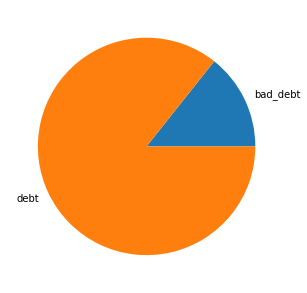

In [26]:
plt.figure(figsize = (5, 5))
plt.pie(raw_norm,labels=['bad_debt','debt'])

## d) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [27]:
df_train['city'].value_counts().head(5)

Chicago         294
Brooklyn        282
Los Angeles     243
Houston         222
Philadelphia    165
Name: city, dtype: int64

In [28]:
df_box_Chicago1=df_train.loc[(df_train.city == 'Chicago') | (df_train.city == 'Brooklyn') | (df_train.city == 'Philadelphia')]
df_box_Chicago1.shape

(741, 79)

In [29]:
#Taking Manhattan,Brooklyn and Philadelphia cities data to analyze the boxplot
df_box_city=df_train.loc[(df_train.city == 'Manhattan') | (df_train.city == 'Brooklyn') | (df_train.city == 'Philadelphia')]
df_box_city.shape

(452, 79)

In [30]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

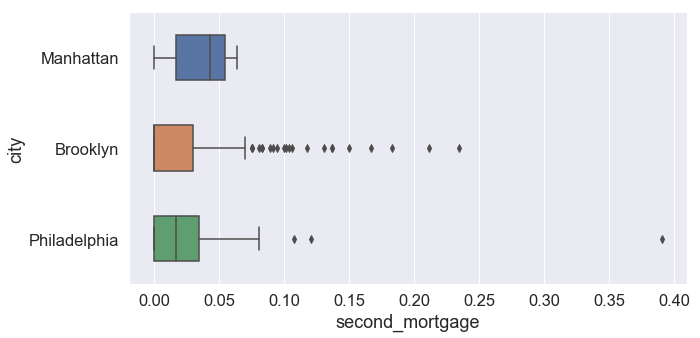

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='second_mortgage', y='city',width=.5)
plt.show()


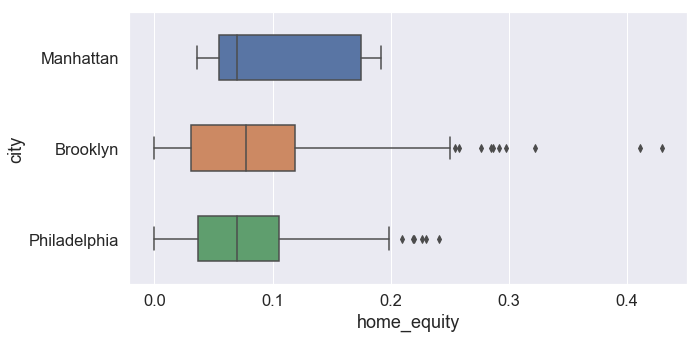

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city',width=0.5)
plt.show()

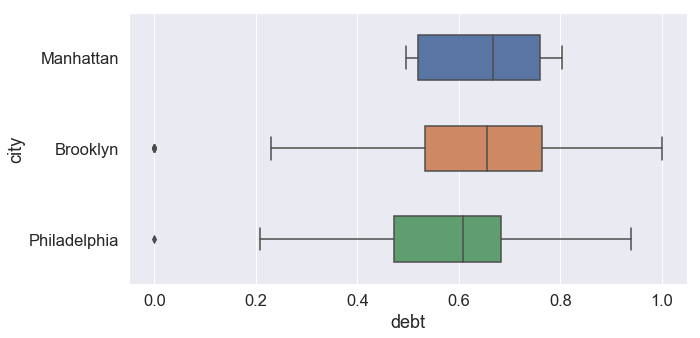

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city',width=0.5)
plt.show()

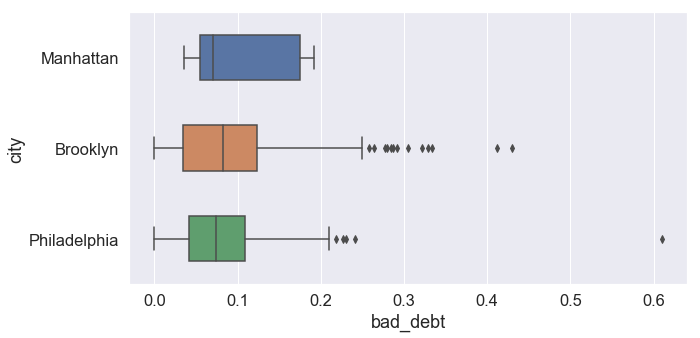

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city',width=0.5)
plt.show()

## e) Create a collated income distribution chart for family income, house hold income, and remaining income

In [35]:
df_train['remaining_income'] = df_train['family_median'] - df_train['hi_median']

In [36]:
income_chart = round(df_train[['city', 'hi_median', 'family_median', 'remaining_income']], 2)
income_chart.head()

city  hi_median  family_median  remaining_income
UID                                                           
267822    Hamilton    48120.0        53245.0            5125.0
246444  South Bend    35186.0        43023.0            7837.0
245683    Danville    74964.0        85395.0           10431.0
279653    San Juan    37845.0        44399.0            6554.0
247218   Manhattan    22497.0        50272.0           27775.0

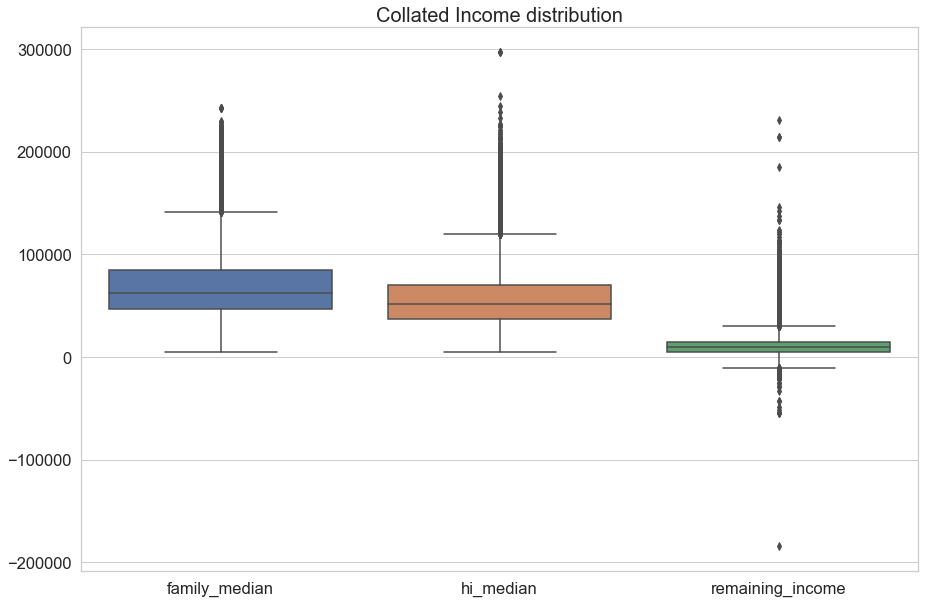

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize = (15, 10))
sns.boxplot(data=df_train[['family_median', 'hi_median', 'remaining_income']]).set_title('Collated Income distribution', fontsize = 20)
plt.show()

C:\ProgramData\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



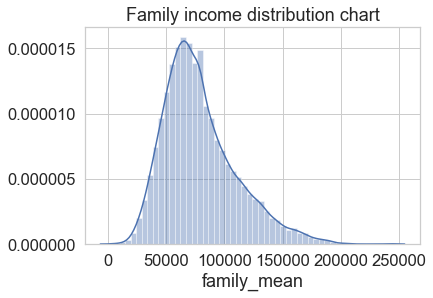

In [38]:
sns.distplot(df_train['family_mean'])
plt.title('Family income distribution chart')
plt.show()

## Exploratory Data Analysis (EDA):

### 1. Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements):

### a) Use pop and ALand variables to create a new field called population density

### b) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age c) Visualize the findings using appropriate chart type¶

In [39]:
df_train['pop_density']=df_train['pop']/df_train['ALand']
df_test['pop_density']=df_test['pop']/df_test['ALand']

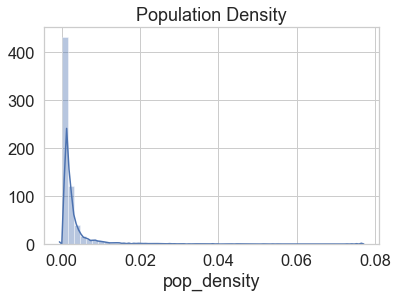

In [40]:
sns.distplot(df_train['pop_density'])
plt.title('Population Density')
plt.show() # Very less density is noticed

In [41]:
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2
df_train[['male_age_median','female_age_median','male_pop','female_pop','age_median']].head()

male_age_median  female_age_median  male_pop  female_pop  age_median
UID                                                                         
267822         44.00000           45.33333      2612        2618   44.666665
246444         32.00000           37.58333      1349        1284   34.791665
245683         40.83333           42.83333      3643        3238   41.833330
279653         48.91667           50.58333      1141        1559   49.750000
247218         22.41667           21.58333      2586        3051   22.000000

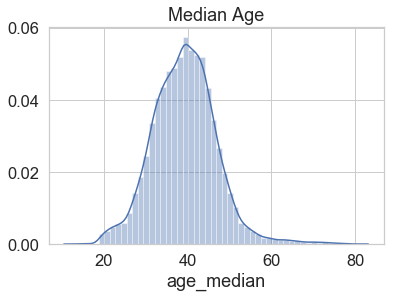

In [42]:
sns.distplot(df_train['age_median'])
plt.title('Median Age')
plt.show()

 -  Age of population is mostly between 20 and 60
 -  Majority are of age around 40
 -  Median age distribution has a gaussian distribution
 - Some right skewness is noticed

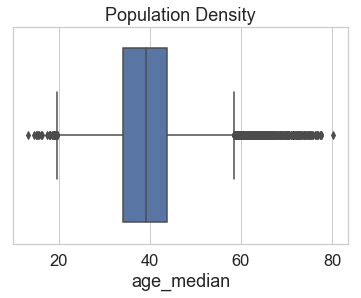

In [43]:
sns.boxplot(df_train['age_median'])
plt.title('Population Density')
plt.show() 

In [44]:
density_eda_df = df_train[['state', 'city', 'place', 'ALand', 'pop', 'male_age_median', 'female_age_median', 'male_pop', 'female_pop']]
density_eda_df.head()

state        city           place        ALand   pop  \
UID                                                                  
267822     New York    Hamilton        Hamilton  202183361.0  5230   
246444      Indiana  South Bend        Roseland    1560828.0  2633   
245683      Indiana    Danville        Danville   69561595.0  6881   
279653  Puerto Rico    San Juan        Guaynabo    1105793.0  2700   
247218       Kansas   Manhattan  Manhattan City    2554403.0  5637   

        male_age_median  female_age_median  male_pop  female_pop  
UID                                                               
267822         44.00000           45.33333      2612        2618  
246444         32.00000           37.58333      1349        1284  
245683         40.83333           42.83333      3643        3238  
279653         48.91667           50.58333      1141        1559  
247218         22.41667           21.58333      2586        3051

In [45]:
density_eda_df['median_age'] = (density_eda_df['male_age_median'] *  density_eda_df['male_pop'] + density_eda_df['female_age_median'] *  density_eda_df['female_pop'])  / density_eda_df['pop']
density_eda_df.head()

C:\ProgramData\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



state        city           place        ALand   pop  \
UID                                                                  
267822     New York    Hamilton        Hamilton  202183361.0  5230   
246444      Indiana  South Bend        Roseland    1560828.0  2633   
245683      Indiana    Danville        Danville   69561595.0  6881   
279653  Puerto Rico    San Juan        Guaynabo    1105793.0  2700   
247218       Kansas   Manhattan  Manhattan City    2554403.0  5637   

        male_age_median  female_age_median  male_pop  female_pop  median_age  
UID                                                                           
267822         44.00000           45.33333      2612        2618   44.667430  
246444         32.00000           37.58333      1349        1284   34.722748  
245683         40.83333           42.83333      3643        3238   41.774472  
279653         48.91667           50.58333      1141        1559   49.879012  
247218         22.41667           21.58333      2586        3051   21.965629

In [46]:
density_eda_df['pop_density'] = density_eda_df['pop'] / density_eda_df['ALand']
density_eda_df.nlargest(300, 'pop_density').head()

C:\ProgramData\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



state           city              place     ALand    pop  \
UID                                                                     
268571    New York       New York  Mount Vernon City  212070.0  16231   
268455    New York       New York      New York City  182091.0  13162   
268575    New York       New York  Mount Vernon City  169349.0  12189   
268443    New York       New York      New York City  183653.0  12427   
230206  California  San Francisco     Daly City City   61277.0   4101   

        male_age_median  female_age_median  male_pop  female_pop  median_age  \
UID                                                                            
268571         33.66667           36.08333      8315        7916   34.845296   
268455         38.83333           34.66667      5597        7565   36.438498   
268575         33.25000           35.33333      6110        6079   34.289016   
268443         37.00000           41.83333      5425        7002   39.723342   
230206         49.08333           55.00000      2465        1636   51.443650   

        pop_density  
UID                  
268571     0.076536  
268455     0.072283  
268575     0.071976  
268443     0.067666  
230206     0.066926

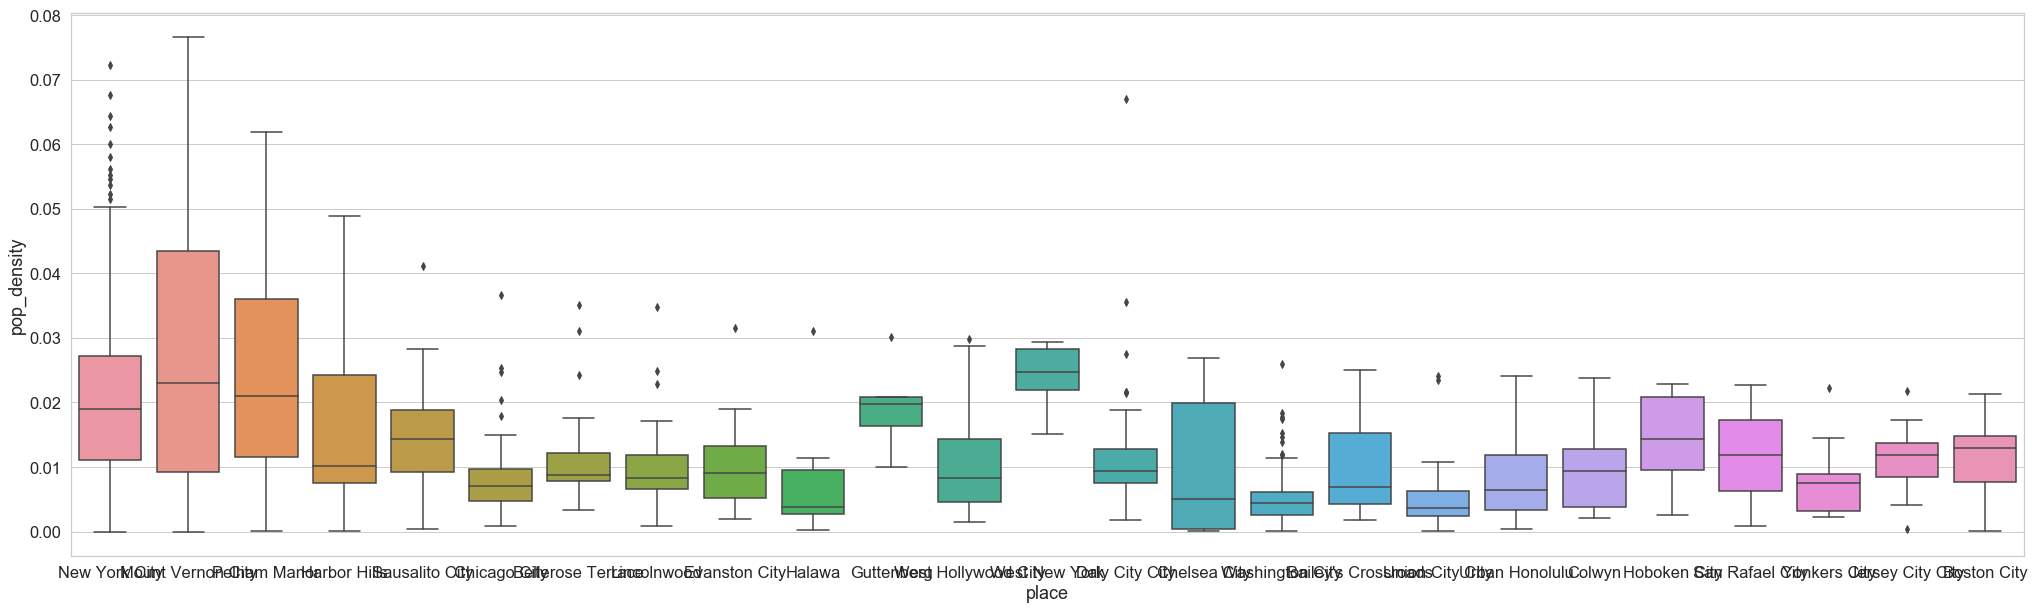

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'place', y = 'pop_density', data=density_eda_df.nlargest(26585, 'pop_density'),  order = ['New York City',
 'Mount Vernon City',
 'Pelham Manor',
 'Harbor Hills',
 'Sausalito City',
 'Chicago City',
 'Bellerose Terrace',
 'Lincolnwood',
 'Evanston City',
 'Halawa',
 'Guttenberg',
 'West Hollywood City',
 'West New York',
 'Daly City City',
 'Chelsea City',
 'Washington City',
 "Bailey's Crossroads",
 'Union City City',
 'Urban Honolulu',
 'Colwyn',
 'Hoboken City',
 'San Rafael City',
 'Yonkers City',
 'Jersey City City',
 'Boston City'])
plt.show()

In [49]:
list(density_eda_df.nsmallest(450, 'pop_density').state.unique())

['New York',
 'Virginia',
 'Kansas',
 'Michigan',
 'New Hampshire',
 'Pennsylvania',
 'Tennessee',
 'Florida',
 'California',
 'Missouri',
 'Texas',
 'Ohio',
 'Hawaii',
 'New Jersey',
 'Arizona',
 'Wyoming',
 'Puerto Rico',
 'Montana',
 'North Carolina',
 'Kentucky',
 'Minnesota',
 'Georgia',
 'Massachusetts',
 'Maryland',
 'Rhode Island',
 'Alabama',
 'Louisiana',
 'Utah',
 'Nevada',
 'Colorado',
 'Washington',
 'South Carolina',
 'Illinois',
 'Iowa',
 'Vermont',
 'Wisconsin',
 'Oregon',
 'Alaska',
 'Idaho',
 'New Mexico',
 'Maine',
 'South Dakota',
 'Nebraska',
 'North Dakota',
 'Oklahoma']

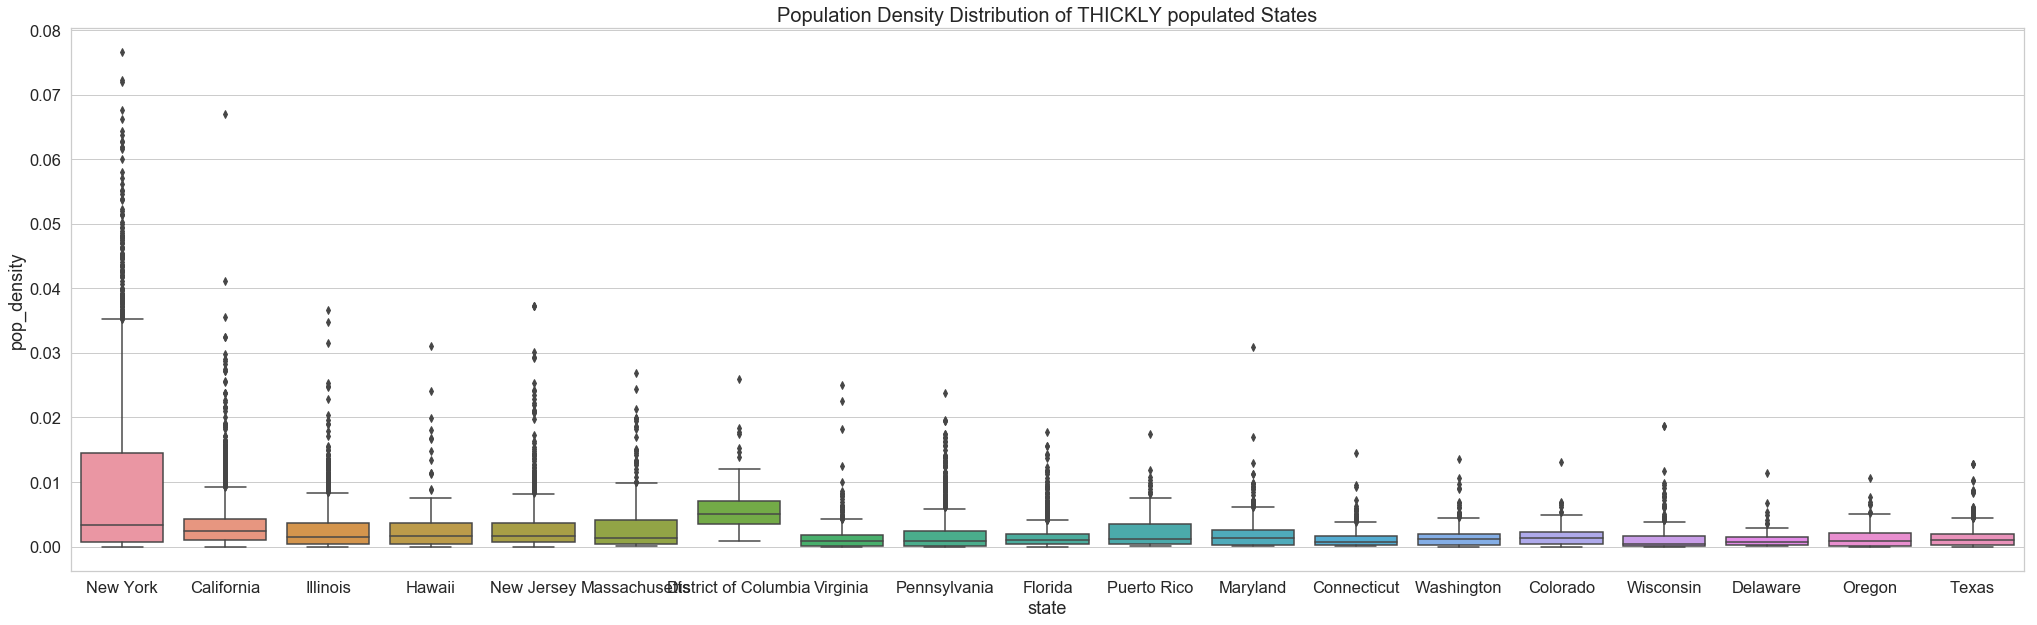

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'state', y = 'pop_density', data=density_eda_df.nlargest(26585, 'pop_density'), order = ['New York', 'California', 'Illinois', 'Hawaii', 'New Jersey', 'Massachusetts', 'District of Columbia', 'Virginia',
                                                                                                                                                                            'Pennsylvania', 'Florida', 'Puerto Rico', 'Maryland', 'Connecticut', 'Washington', 'Colorado', 'Wisconsin',
                                                                                                                            'Delaware', 'Oregon', 'Texas']).set_title('Population Density Distribution of THICKLY populated States', fontsize = 20)
plt.show()

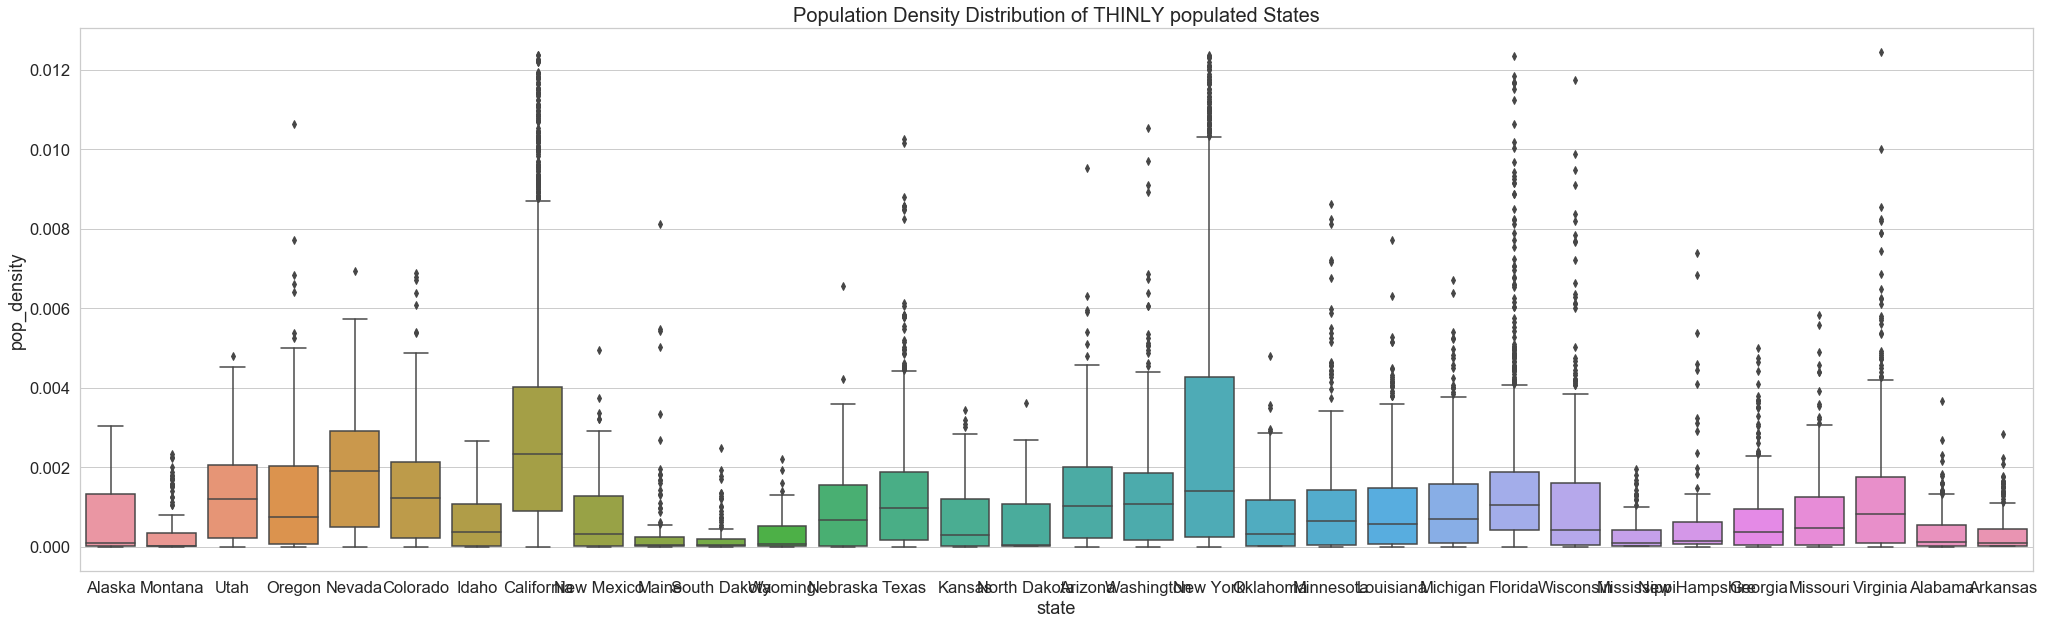

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'state', y = 'pop_density', data=density_eda_df.nsmallest(26585, 'pop_density'), order = ['Alaska', 'Montana', 'Utah', 'Oregon', 'Nevada', 'Colorado', 'Idaho', 'California', 'New Mexico',
                                                                                                                                                                                 'Maine', 'South Dakota', 'Wyoming', 'Nebraska', 'Texas', 'Kansas', 'North Dakota', 'Arizona',
                                                                                                                                                                                 'Washington', 'New York', 'Oklahoma', 'Minnesota', 'Louisiana', 'Michigan', 'Florida', 'Wisconsin', 'Mississippi',
                                                                                                                                                                                 'New Hampshire', 'Georgia', 'Missouri', 'Virginia', 'Alabama', 'Arkansas']).set_title('Population Density Distribution of THINLY populated States', fontsize = 20)
plt.show()

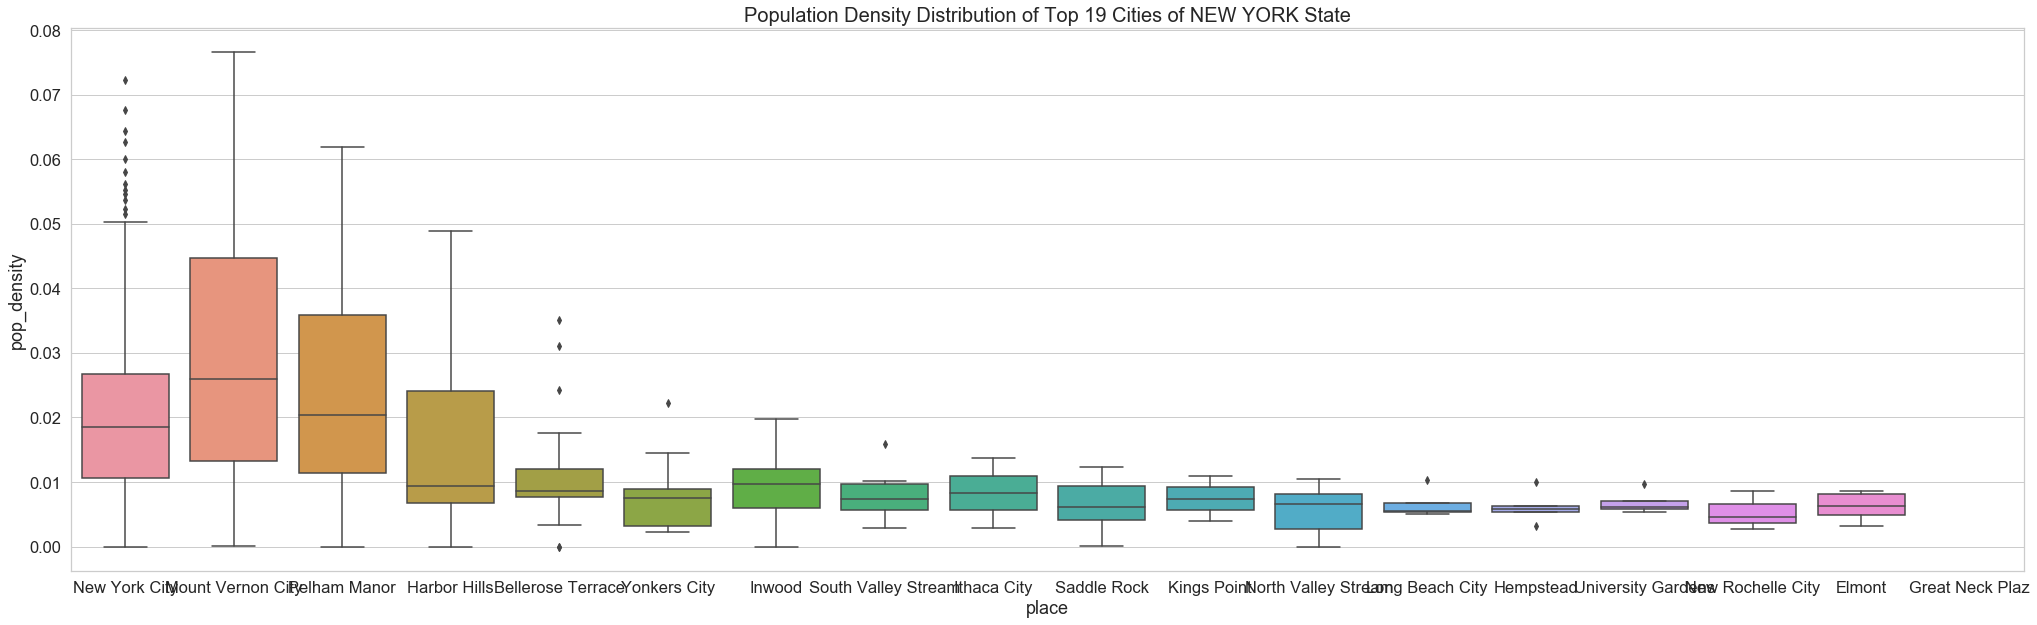

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'place', y = 'pop_density', data=density_eda_df[density_eda_df['state'] == 'New York'].nlargest(26585, 'pop_density'), order = ['New York City',
 'Mount Vernon City',
 'Pelham Manor',
 'Harbor Hills',
 'Bellerose Terrace',
 'Yonkers City',
 'Inwood',
 'South Valley Stream',
 'Ithaca City',
 'Saddle Rock',
 'Kings Point',
 'North Valley Stream',
 'Long Beach City',
 'Hempstead',
 'University Gardens',
 'New Rochelle City',
 'Elmont',
 'Great Neck Plaz']
).set_title('Population Density Distribution of Top 19 Cities of NEW YORK State', fontsize = 20)
plt.show()

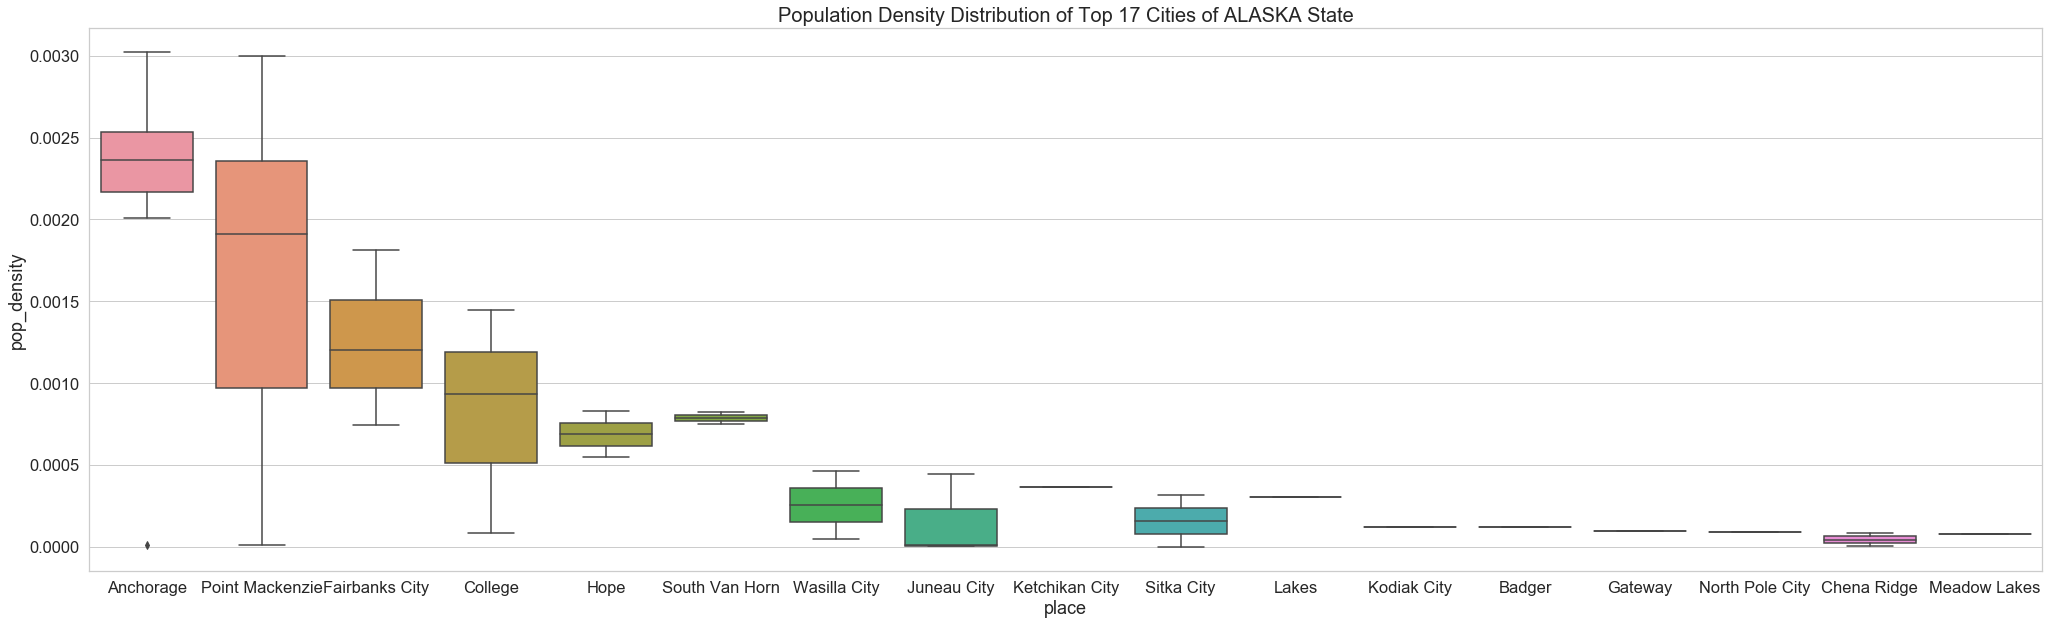

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'place', y = 'pop_density', data=density_eda_df[density_eda_df['state'] == 'Alaska'].nlargest(26585, 'pop_density'), order = ['Anchorage', 'Point Mackenzie', 'Fairbanks City', 'College', 'Hope', 'South Van Horn', 
                                                                                                                                                                                    'Wasilla City', 'Juneau City', 'Ketchikan City', 'Sitka City', 'Lakes', 'Kodiak City', 'Badger', 'Gateway', 'North Pole City', 'Chena Ridge', 'Meadow Lakes']
).set_title('Population Density Distribution of Top 17 Cities of ALASKA State', fontsize = 20)
plt.show()

In [54]:
print(list(density_eda_df.nlargest(450, 'median_age').state.unique()))
print(len(list(density_eda_df.nlargest(450, 'median_age').state.unique())))

['New York', 'Florida', 'California', 'Maryland', 'New Jersey', 'Arizona', 'Mississippi', 'Nevada', 'Pennsylvania', 'Georgia', 'Arkansas', 'Illinois', 'North Carolina', 'Massachusetts', 'South Carolina', 'Delaware', 'Ohio', 'Texas', 'Alabama', 'New Mexico', 'Tennessee', 'Oregon', 'Michigan', 'Hawaii', 'Minnesota', 'Oklahoma', 'Wisconsin', 'Missouri', 'Washington', 'Colorado', 'Virginia', 'Maine', 'Louisiana', 'Indiana']
34


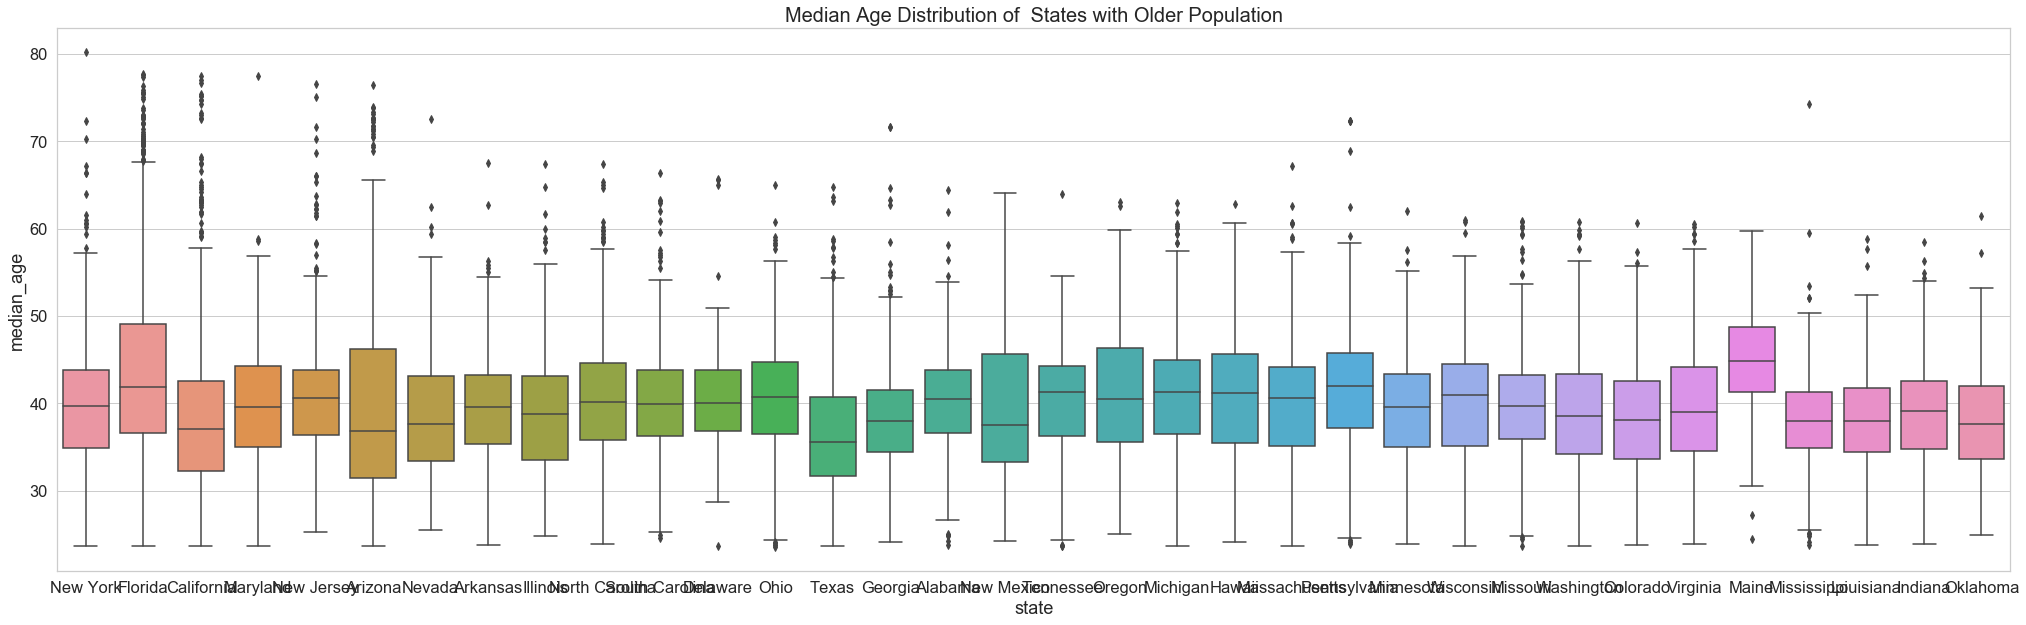

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))


ax = sns.boxplot(x = 'state', y = 'median_age', data=density_eda_df.nlargest(26585, 'median_age'),
            order = ['New York', 'Florida', 'California', 'Maryland', 'New Jersey', 'Arizona', 'Nevada', 'Arkansas', 'Illinois', 'North Carolina', 'South Carolina', 'Delaware', 'Ohio', 'Texas', 'Georgia', 'Alabama', 'New Mexico', 'Tennessee', 
            'Oregon', 'Michigan', 'Hawaii', 'Massachusetts', 'Pennsylvania', 'Minnesota', 'Wisconsin', 'Missouri', 'Washington', 'Colorado', 'Virginia', 'Maine', 'Mississippi', 'Louisiana', 'Indiana', 'Oklahoma']
           ).set_title('Median Age Distribution of  States with Older Population', fontsize = 20)

#ax.set(ylim=(0, 100))

plt.show()

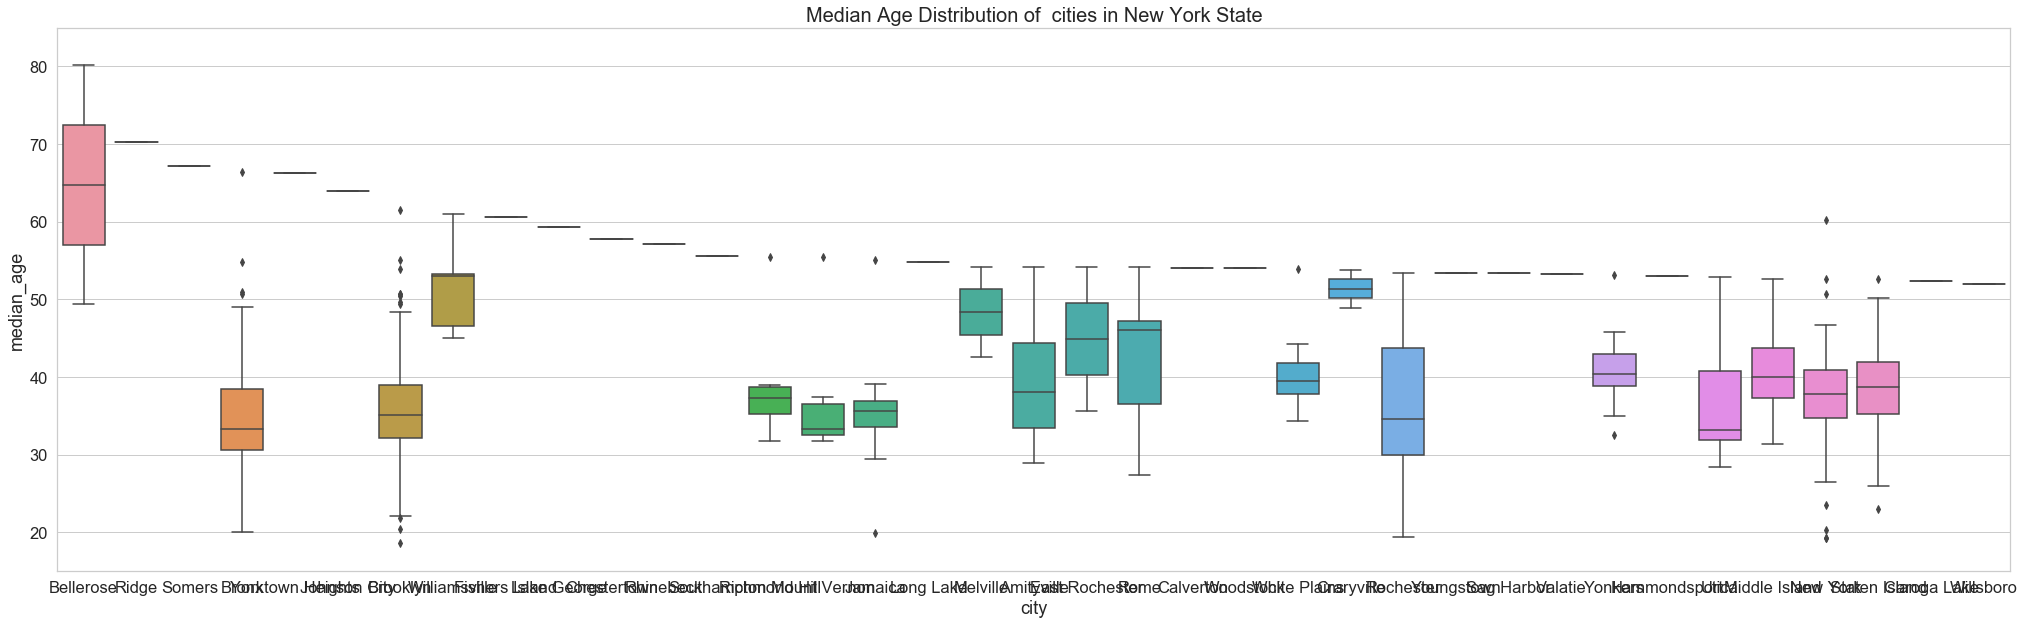

In [56]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
ax = sns.boxplot(x = 'city', y = 'median_age', data=density_eda_df[density_eda_df['state'] == 'New York'].nlargest(26585, 'median_age'), 
            order =['Bellerose', 'Ridge', 'Somers', 'Bronx', 'Yorktown Heights', 'Johnson City', 'Brooklyn', 'Williamsville', 'Fishers Island', 'Lake George', 'Chestertown', 'Rhinebeck', 
                    'Southampton', 'Richmond Hill', 'Mount Vernon', 'Jamaica', 'Long Lake', 'Melville', 'Amityville', 'East Rochester', 'Rome', 'Calverton', 'Woodstock', 'White Plains', 'Craryville', 
                    'Rochester', 'Youngstown', 'Sag Harbor', 'Valatie', 'Yonkers', 'Hammondsport', 'Utica', 'Middle Island', 'New York', 'Staten Island', 'Caroga Lake', 'Willsboro']
)
ax.set_title('Median Age Distribution of  cities in New York State', fontsize = 20)
ax.set(ylim=(15, 85))
plt.show()

In [57]:
list(density_eda_df[density_eda_df['state'] == 'New York'].nlargest(600, 'pop_density').place.unique())
print(len(list(density_eda_df[density_eda_df['state'] == 'New York'].nlargest(600, 'pop_density').place.unique())))

15


## 2. Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

a) Analyze the married, separated, and divorced population for these population brackets

b) Visualize using appropriate chart type

In [58]:
df_train['male_age_median'].describe()

count    27321.000000
mean        38.074193
std          7.847366
min          9.750000
25%         32.916670
50%         37.916670
75%         42.916670
max         80.166670
Name: male_age_median, dtype: float64

In [59]:
bins = [0, 12,18, 35, 55, 100]
labels = ['kids', 'Youth', 'Young Adult', 'Adult', 'Senior']

In [60]:
df_train['male_population_bracket'] = pd.cut(df_train['male_age_median'], bins, labels = labels)

In [61]:
df_train['female_population_bracket'] = pd.cut(df_train['female_age_median'], bins, labels = labels)

In [62]:
age_df = df_train[['state', 'city', 'place', 'pop', 'male_pop', 'female_pop', 'male_age_median', 'female_age_median', 'married', 'separated', 'divorced','male_population_bracket','female_population_bracket']]
age_df.head()

state        city           place   pop  male_pop  female_pop  \
UID                                                                           
267822     New York    Hamilton        Hamilton  5230      2612        2618   
246444      Indiana  South Bend        Roseland  2633      1349        1284   
245683      Indiana    Danville        Danville  6881      3643        3238   
279653  Puerto Rico    San Juan        Guaynabo  2700      1141        1559   
247218       Kansas   Manhattan  Manhattan City  5637      2586        3051   

        male_age_median  female_age_median  married  separated  divorced  \
UID                                                                        
267822         44.00000           45.33333  0.57851    0.01240   0.08770   
246444         32.00000           37.58333  0.34886    0.01426   0.09030   
245683         40.83333           42.83333  0.64745    0.01607   0.10657   
279653         48.91667           50.58333  0.47257    0.02021   0.10106   
247218         22.41667           21.58333  0.12356    0.00000   0.03109   

       male_population_bracket female_population_bracket  
UID                                                       
267822                   Adult                     Adult  
246444             Young Adult                     Adult  
245683                   Adult                     Adult  
279653                   Adult                     Adult  
247218             Young Adult               Young Adult

C:\ProgramData\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



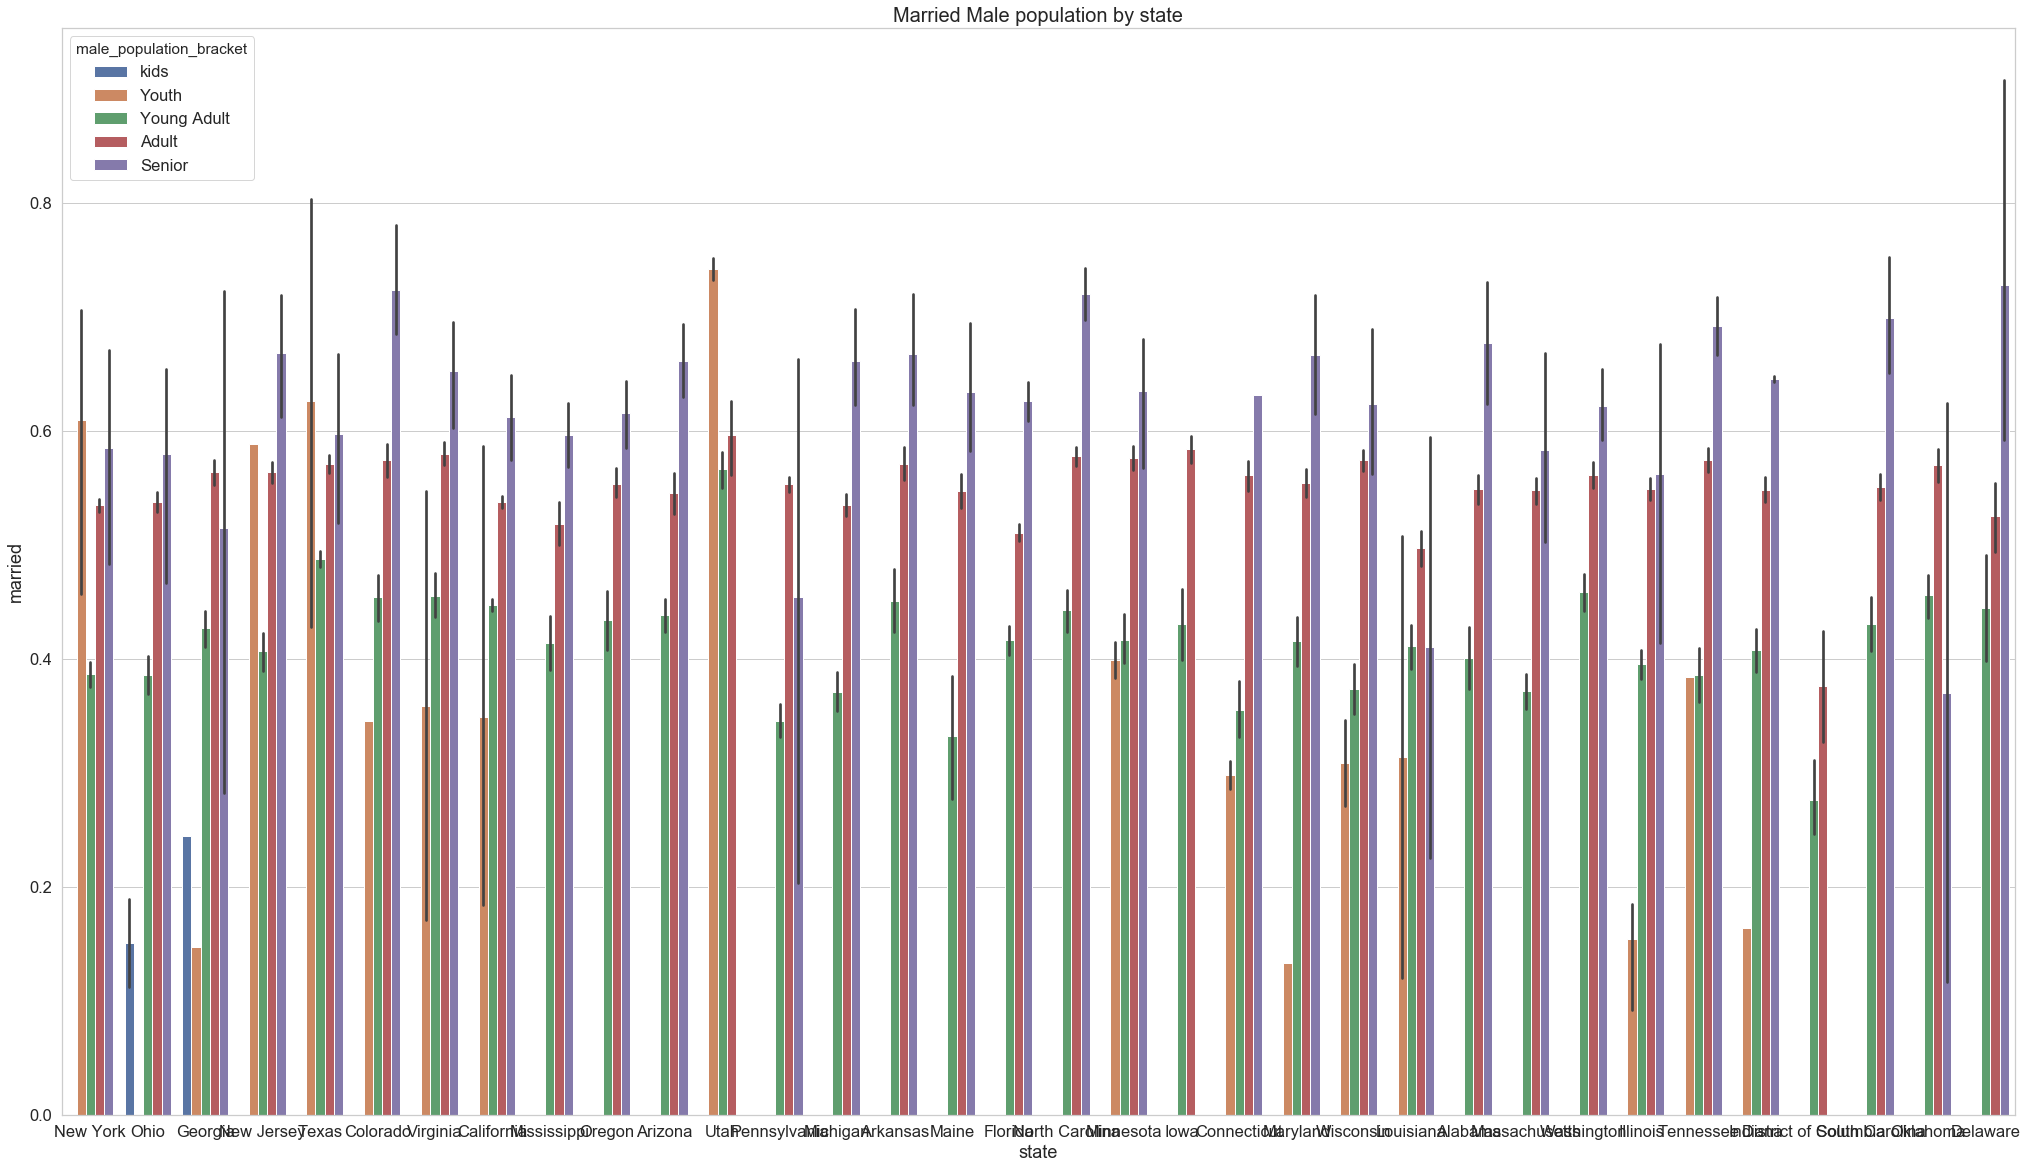

In [63]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 20))

ax = sns.barplot(x = 'state', y = 'married', hue = 'male_population_bracket', data = age_df,
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Married Male population by state', fontsize = 20)

plt.show()

"Ohio & Georgia" have Married Male KIDS

In [64]:
age_df.city.unique()

array(['Hamilton', 'South Bend', 'Danville', ..., 'Blue Bell', 'Weldona',
       'Colleyville'], dtype=object)

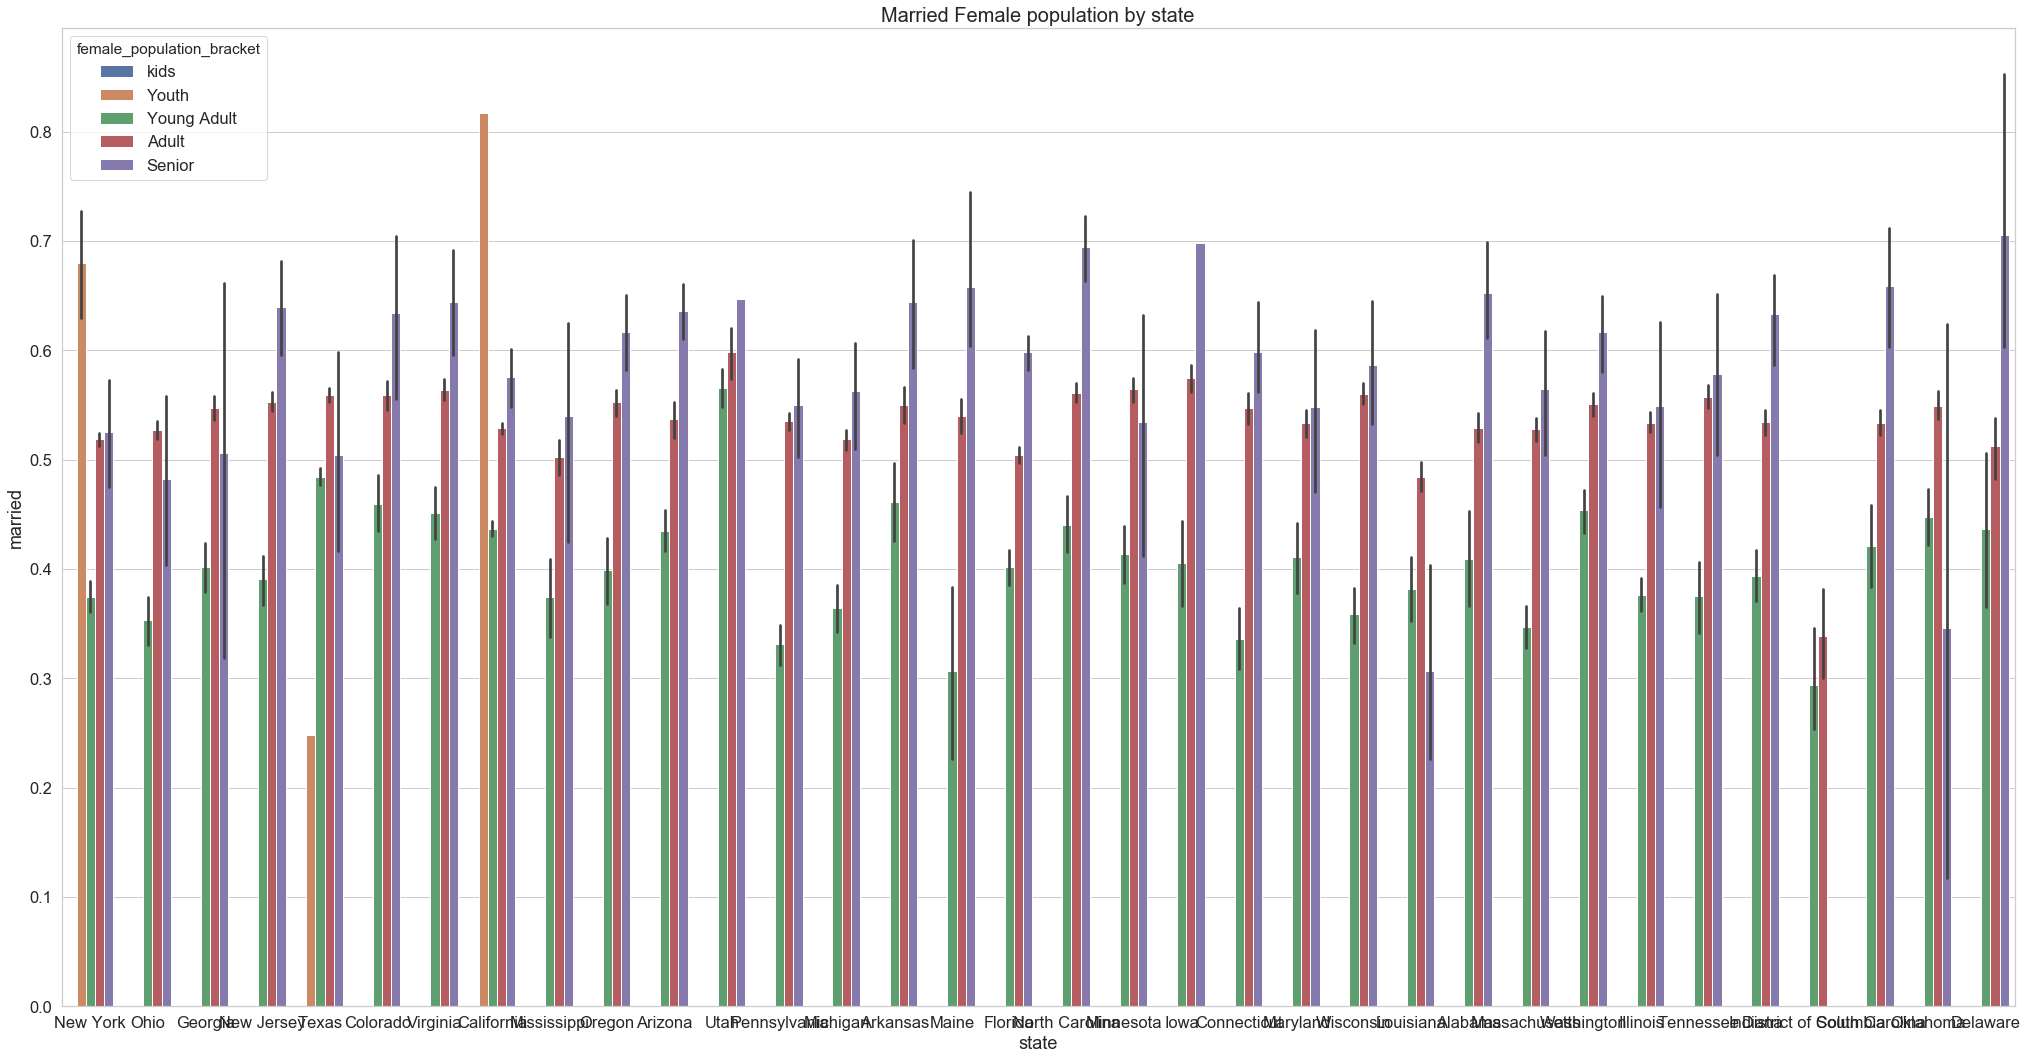

In [65]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 18))

ax = sns.barplot(x = 'state', y = 'married', hue = 'female_population_bracket', data = age_df, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Married Female population by state', fontsize = 20)

plt.show()

Except for "Newyork","California" and "Texas", NO other state has Married Female KIDS or Youth


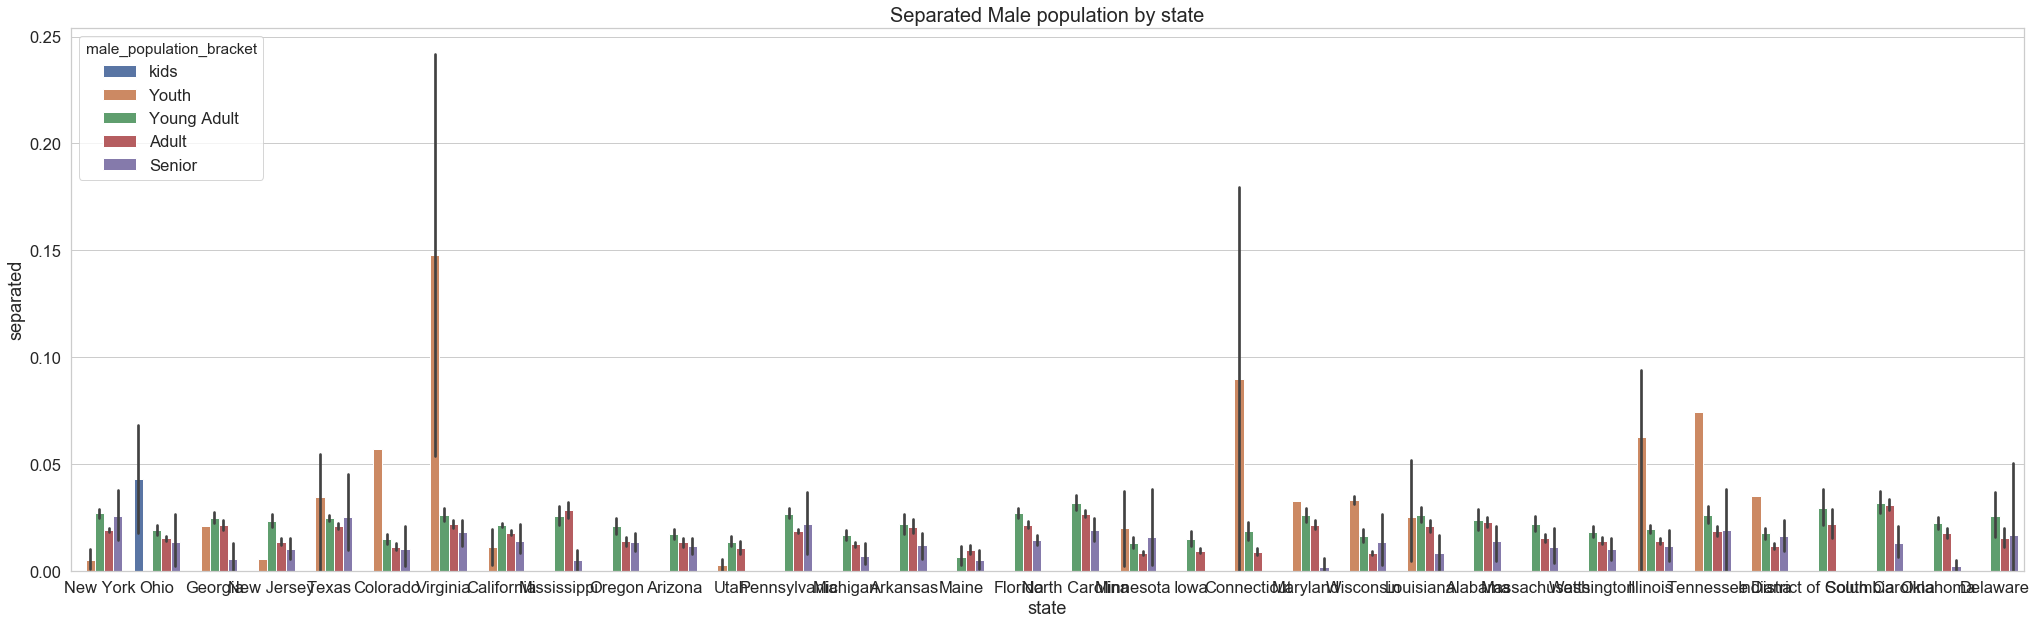

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'separated', hue = 'male_population_bracket', data = age_df, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Separated Male population by state', fontsize = 20)

plt.show()

"Connecticut, followed by Virginia", has Highest Separated Male Youth population

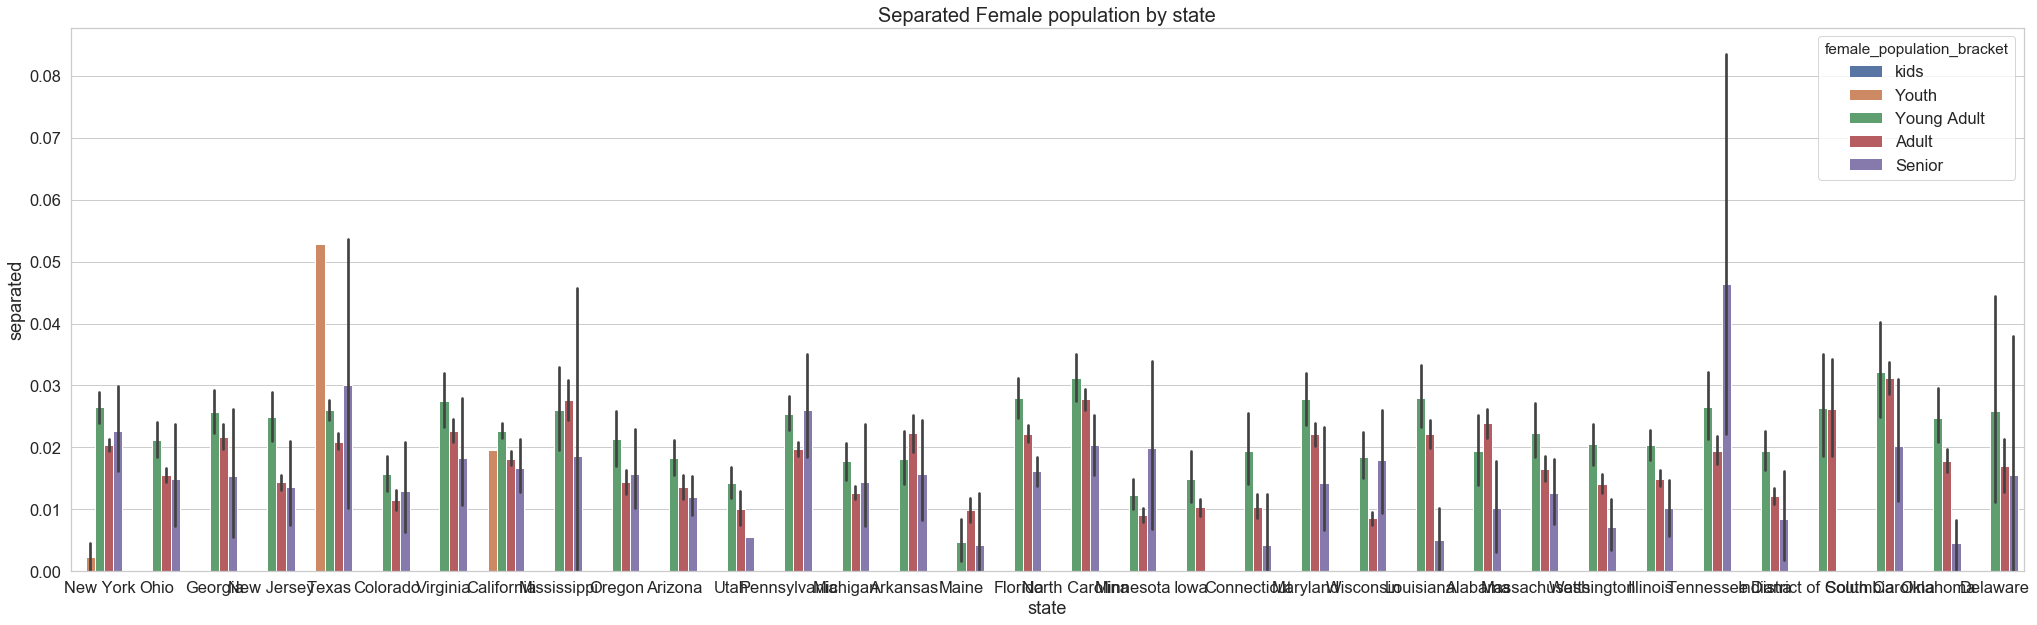

In [67]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'separated', hue = 'female_population_bracket', data = age_df,
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Separated Female population by state', fontsize = 20)

plt.show()

 - Except for "Newyork","California" and "Texas", No other state has Separated Female Youth population
 - "Tennessee" has the Highest Separated Female SENIOR population

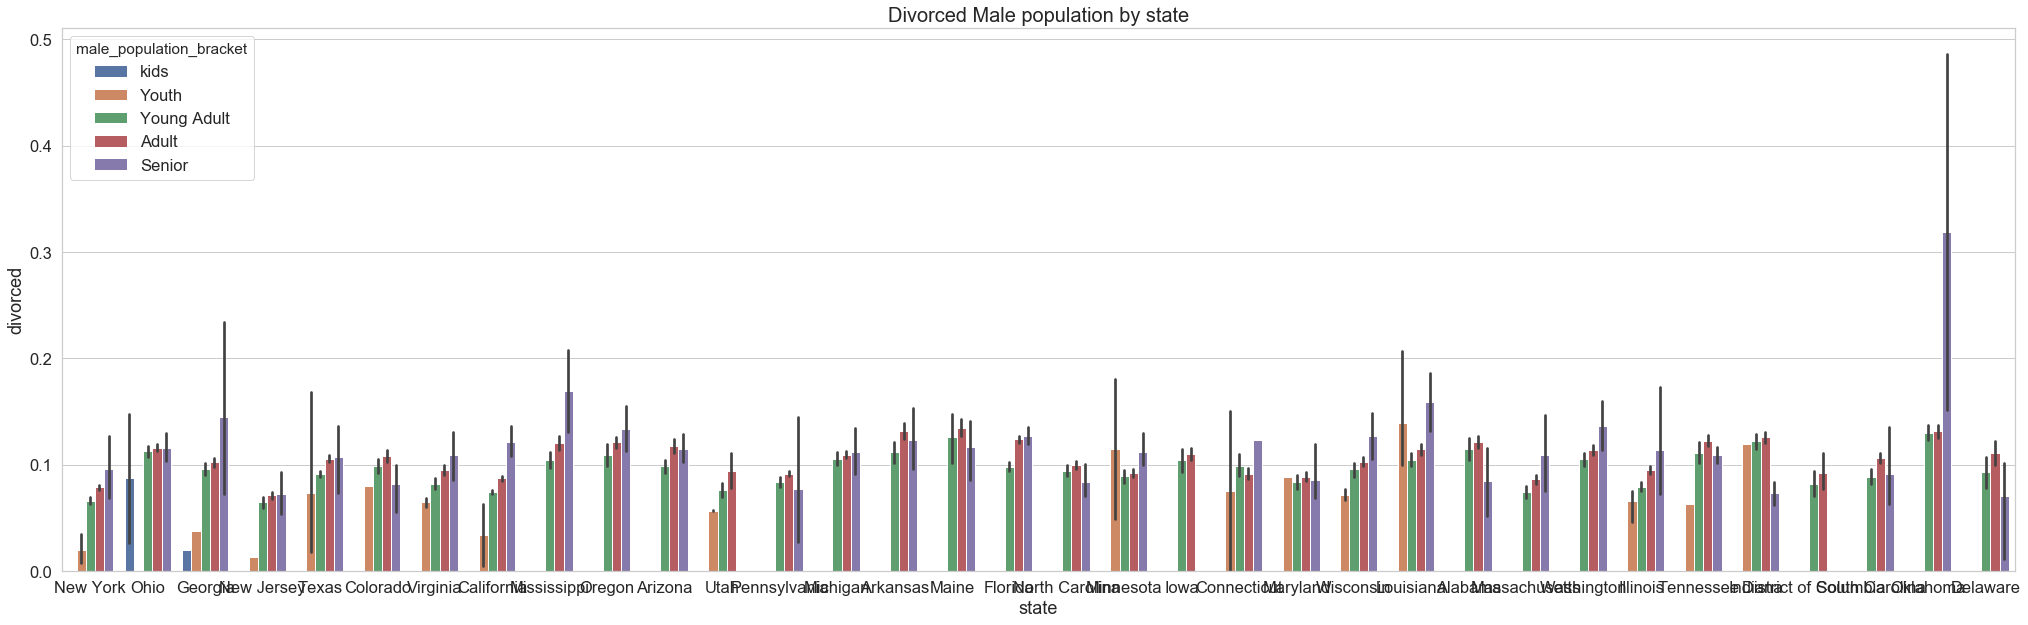

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'divorced', hue = 'male_population_bracket', data = age_df, 
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Divorced Male population by state', fontsize = 20)

plt.show()

 - "Ohio", has Largest number of Divorced Male KIDS.
 - "Maine, Indiana & Oklahoma", has Largest number of Divorced Male YOUNG ADULTS
 - "Arkansas, Maine, Indiana & Oklahoma", has Largest number of Divorced Male ADULTS
 - "Louisiana & OKlahoma", has Largest number of Divorced Male SENIORS.
 - "OKlahoma", is the Divorce Capital for MALE population.

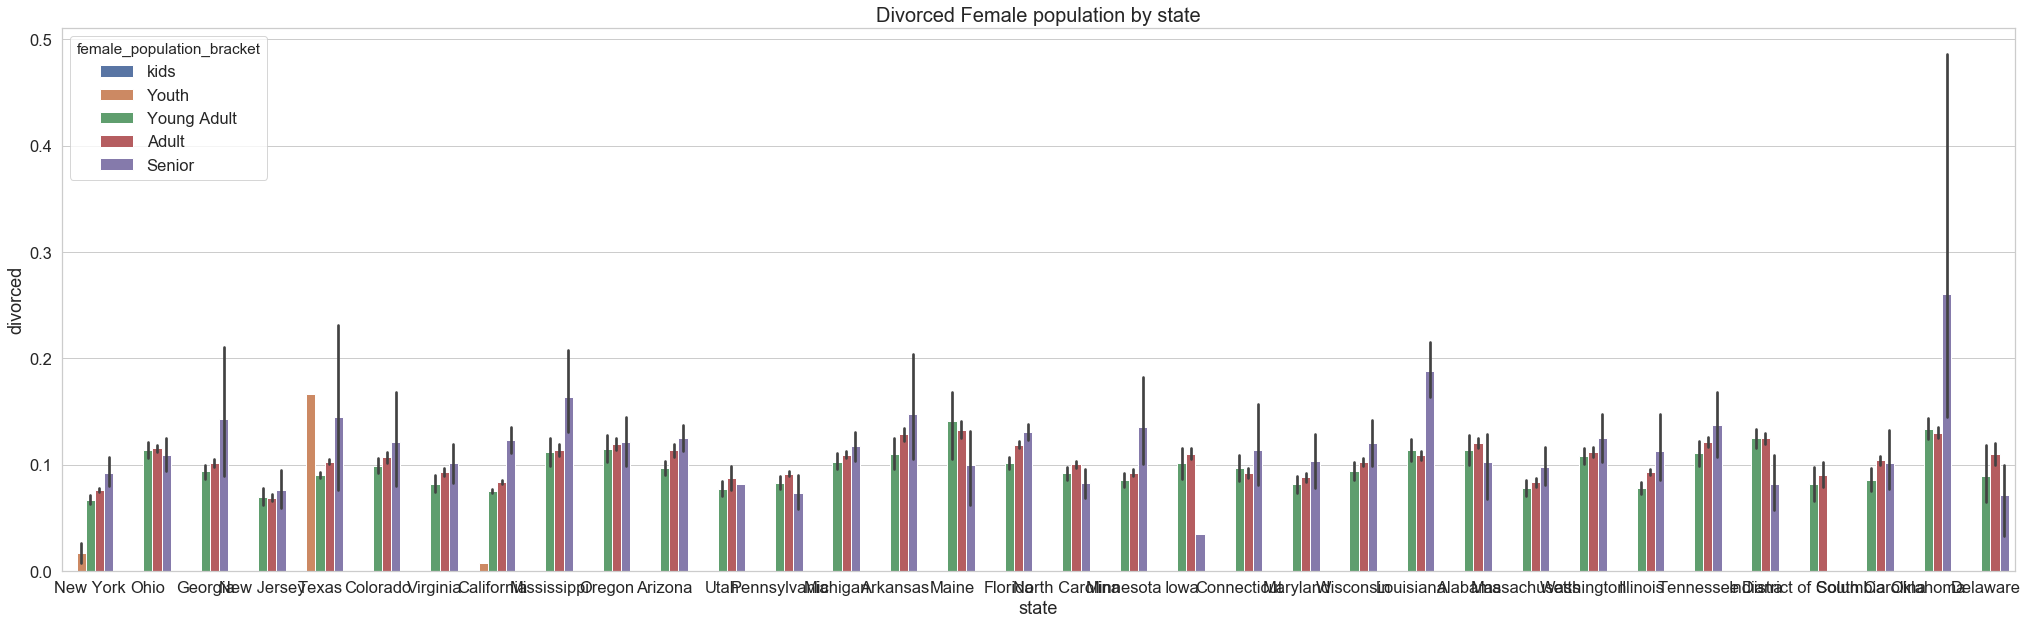

In [69]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'divorced', hue = 'female_population_bracket', data = age_df,
           order = ['New York', 'Ohio', 'Georgia', 'New Jersey', 'Texas', 'Colorado', 'Virginia', 'California', 'Mississippi', 'Oregon', 'Arizona', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 
                     'Minnesota', 'Iowa', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Alabama', 'Massachusetts', 'Washington', 'Illinois', 'Tennessee', 'Indiana', 'District of Columbia', 'South Carolina', 'Oklahoma', 'Delaware'])

ax.set_title('Divorced Female population by state', fontsize = 20)

plt.show()

 - "Newyork","California" and "Texas", are the only states that has Divorced Female YOUTH.
 - "Maine", has Largest number of Divorced Female YOUNG ADULTS
 - "Maine", has Largest number of Divorced Female ADULTS
 - "Louisiana", has Largest number of Divorced Female SENIORS.


## 3. Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [70]:
rent_df = df_train[['state', 'city', 'rent_median', 'hi_median', 'family_median']]
rent_df.head()

state        city  rent_median  hi_median  family_median
UID                                                                   
267822     New York    Hamilton        784.0    48120.0        53245.0
246444      Indiana  South Bend        848.0    35186.0        43023.0
245683      Indiana    Danville        703.0    74964.0        85395.0
279653  Puerto Rico    San Juan        782.0    37845.0        44399.0
247218       Kansas   Manhattan        881.0    22497.0        50272.0

In [71]:
Overall_rent_percentage = (rent_df['rent_median'].sum() / rent_df['hi_median'].sum()) * 100
round(Overall_rent_percentage, 2)

1.75

Overall Rent as a percentage of Overall House Hold Income is around 1.74%

In [72]:
rent_df['ov_rent_pcnt'] = round((rent_df['rent_median'] / rent_df['hi_median']) * 100, 2)
rent_df.head()

C:\ProgramData\Anaconda31\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



state        city  rent_median  hi_median  family_median  \
UID                                                                      
267822     New York    Hamilton        784.0    48120.0        53245.0   
246444      Indiana  South Bend        848.0    35186.0        43023.0   
245683      Indiana    Danville        703.0    74964.0        85395.0   
279653  Puerto Rico    San Juan        782.0    37845.0        44399.0   
247218       Kansas   Manhattan        881.0    22497.0        50272.0   

        ov_rent_pcnt  
UID                   
267822          1.63  
246444          2.41  
245683          0.94  
279653          2.07  
247218          3.92

In [73]:
print(list(rent_df.nlargest(20, 'ov_rent_pcnt').state.unique()))
print(len(list(rent_df.nlargest(20, 'ov_rent_pcnt').state.unique())))

['Florida', 'Arizona', 'Virginia', 'Illinois', 'Georgia', 'Texas', 'North Carolina', 'Louisiana', 'Ohio', 'California', 'Indiana', 'Wisconsin']
12


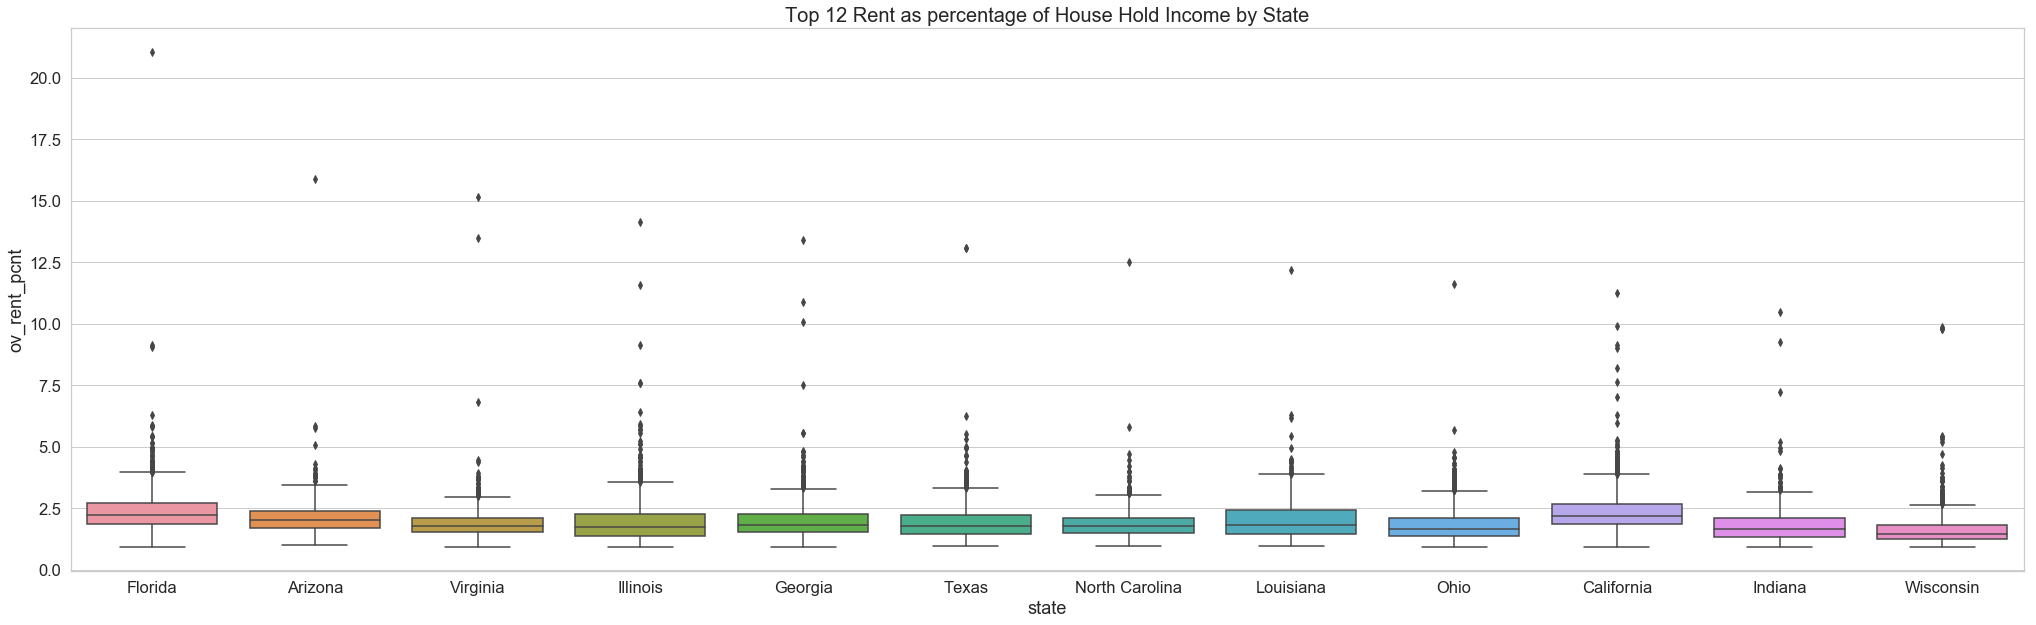

In [74]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
ax = sns.boxplot(x = 'state', y = 'ov_rent_pcnt', data=rent_df.nlargest(26585, 'ov_rent_pcnt'), 
            order = ['Florida', 'Arizona', 'Virginia', 'Illinois', 'Georgia', 'Texas', 'North Carolina', 'Louisiana', 'Ohio', 'California', 'Indiana', 'Wisconsin']
           ).set_title('Top 12 Rent as percentage of House Hold Income by State', fontsize = 20)
#ax.set(ylim=(0, 100))
plt.show()

## 4. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

C:\ProgramData\Anaconda31\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



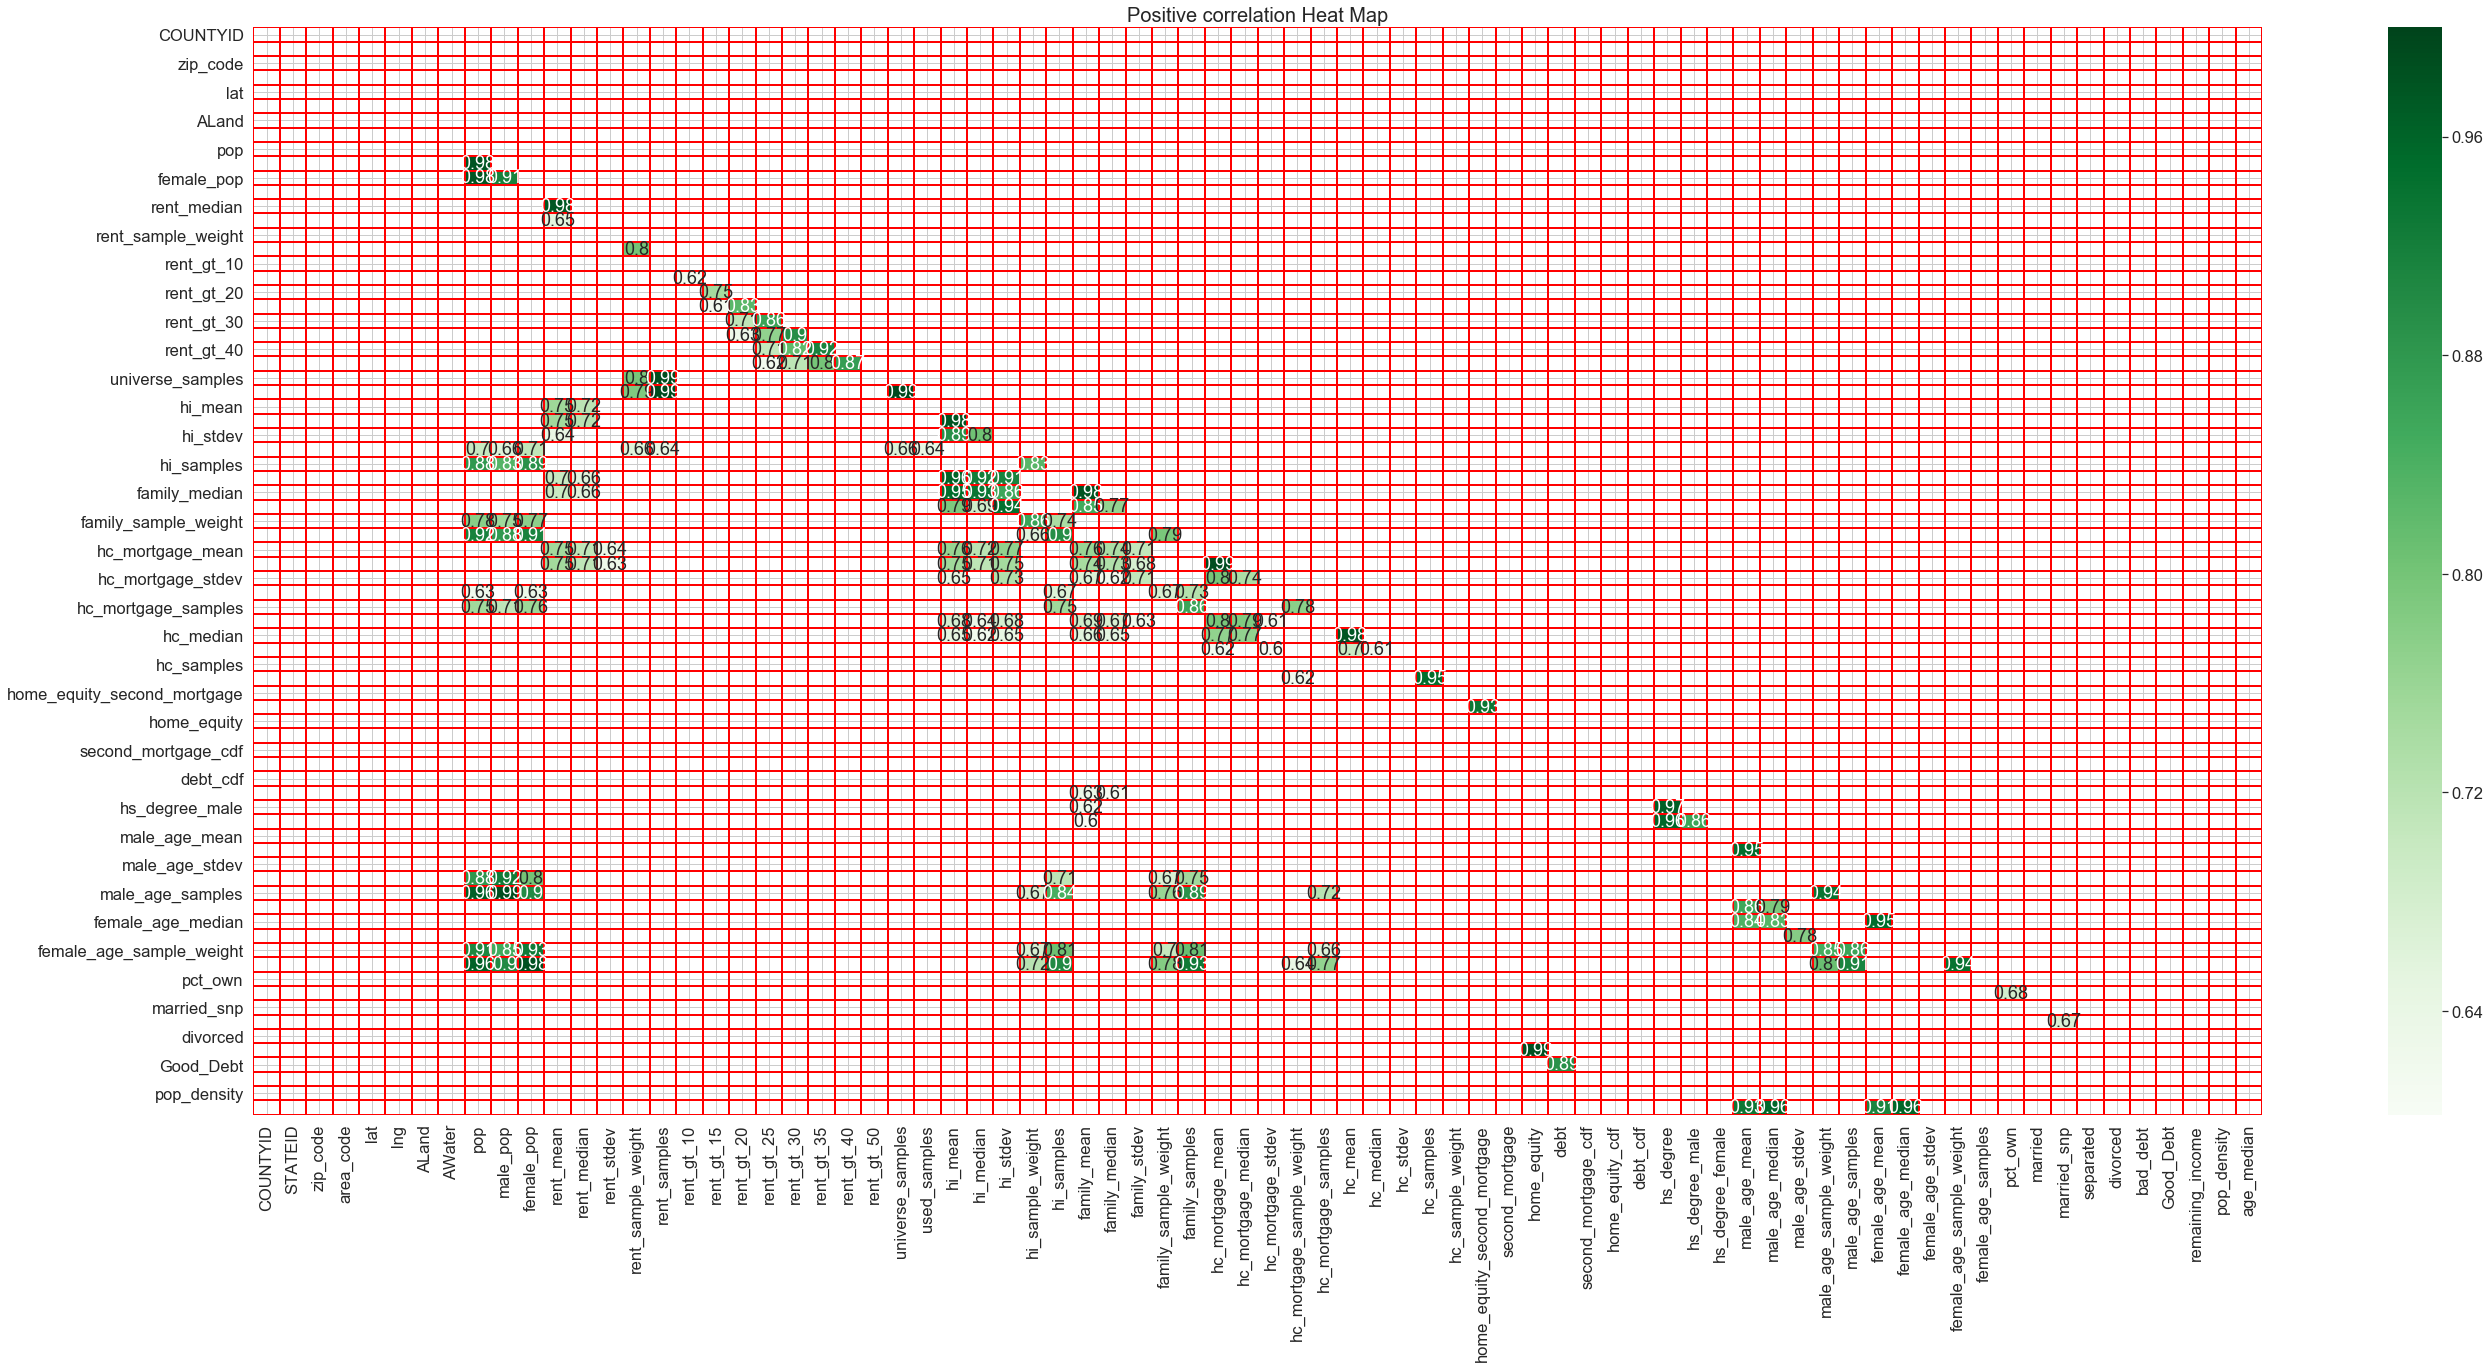

In [75]:
sns.set_style("whitegrid")

corr = df_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

kot = corr[corr>=.6]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Greens", annot = True, mask = mask, linewidths=1, linecolor='red').set_title('Positive correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

- "Population parameters" have Strong positive correlation wih "Sample Parameters".

- "Male Population is highly correlated with Female population.     

- "rent Mean & Median" has  high positive correlation with "House hold income Mean, Median and Standard Deviation",  
   where as "rent Standard Deviation has positive correlatioin with "hc mortgage mean & median". 

- "House hold income and Family income are highly positively correlated. <br/>        
 
- "Family Income"  and "hc_mortgage" are positively correlated.

- "pct_own" is positively correlated with "Married" marital status

In [76]:
cor=df_train[['COUNTYID','STATEID','zip_code','type','pop', 'family_mean',
         'second_mortgage', 'home_equity', 'debt','hs_degree',
           'age_median','pct_own', 'married','separated', 'divorced']].corr()

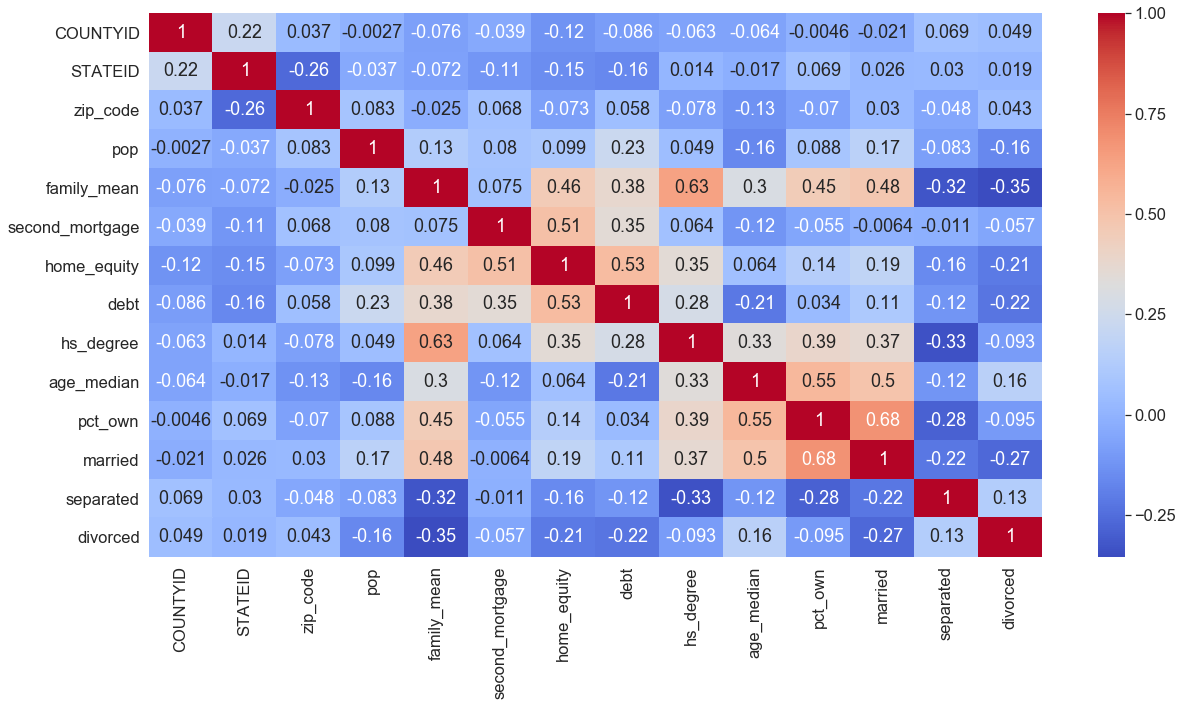

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

## Data Pre-processing: 1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables: 
### • Highschool graduation rates • Median population age • Second mortgage statistics • Percent own • Bad debt expense

In [78]:
!pip install factor_analyzer

In [79]:
def cat_variables(df):
    cat_variables = list(df.select_dtypes(exclude = ['int', 'float']).columns)
    return cat_variables

In [80]:
def num_variables(df):
    num_variables = list(df.select_dtypes(include = ['int', 'float']).columns)
    return num_variables

In [81]:
df_train.city.dtype

dtype('O')

In [82]:
cat_variables(df_train)

['COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'primary',
 'zip_code',
 'area_code',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'universe_samples',
 'used_samples',
 'male_population_bracket',
 'female_population_bracket']

In [83]:
num_variables(df_train)

['lat',
 'lng',
 'ALand',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_sample

In [84]:
fa_train_df = df_train[num_variables(df_train)]
fa_train_df.head()

lat        lng        ALand  rent_mean  rent_median  rent_stdev  \
UID                                                                             
267822  42.840812 -75.501524  202183361.0  769.38638        784.0   232.63967   
246444  41.701441 -86.266614    1560828.0  804.87924        848.0   253.46747   
245683  39.792202 -86.515246   69561595.0  742.77365        703.0   323.39011   
279653  18.396103 -66.104169    1105793.0  803.42018        782.0   297.39258   
247218  39.195573 -96.569366    2554403.0  938.56493        881.0   392.44096   

        rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
UID                                                                            
267822           272.34441         362.0     0.86761     0.79155     0.59155   
246444           312.58622         513.0     0.97410     0.93227     0.69920   
245683           291.85520         378.0     0.95238     0.88624     0.79630   
279653           259.30316         368.0     0.94693     0.87151     0.69832   
247218          1005.42886        1704.0     0.99286     0.98247     0.91688   

        rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
UID                                                                  
267822     0.45634     0.42817     0.18592     0.15493     0.12958   
246444     0.69920     0.55179     0.41235     0.39044     0.27888   
245683     0.66667     0.39153     0.39153     0.28307     0.15873   
279653     0.61732     0.51397     0.46927     0.35754     0.32961   
247218     0.84740     0.78247     0.60974     0.55455     0.44416   

            hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
UID                                                                         
267822  63125.28406    48120.0  49042.01206        1290.96240      2024.0   
246444  41931.92593    35186.0  31639.50203         838.74664      1127.0   
245683  84942.68317    74964.0  56811.62186        1155.20980      2488.0   
279653  48733.67116    37845.0  45100.54010         928.32193      1267.0   
247218  31834.15466    22497.0  34046.50907        1548.67477      1983.0   

        family_mean  family_median  family_stdev  family_sample_weight  \
UID                                                                      
267822  67994.14790        53245.0   47667.30119             884.33516   
246444  50670.10337        43023.0   34715.57548             375.28798   
245683  95262.51431        85395.0   49292.67664             709.74925   
279653  56401.68133        44399.0   41082.90515             490.18479   
247218  54053.42396        50272.0   39609.12605             244.08903   

        family_samples  hc_mortgage_mean  hc_mortgage_median  \
UID                                                            
267822          1491.0        1414.80295              1223.0   
246444           554.0         864.41390               784.0   
245683          1889.0        1506.06758              1361.0   
279653           729.0        1175.28642              1101.0   
247218           395.0        1192.58759              1125.0   

        hc_mortgage_stdev  hc_mortgage_sample_weight  hc_mortgage_samples  \
UID                                                                         
267822          641.22898                  377.83135                867.0   
246444          482.27020                  316.88320                356.0   
245683          731.89394                  699.41354               1491.0   
279653          428.98751                  261.28471                437.0   
247218          327.49674                   76.61052                134.0   

          hc_mean  hc_median   hc_stdev  hc_samples  hc_sample_weight  \
UID                                                                     
267822  570.01530      558.0  270.11299       770.0         499.29293   
246444  351.98293      336.0  125.40457       229.0         189.60606   
245683  556.45986      532.0  184.42175       538.0   

In [85]:
# exclude columns you don't want
fa_train_df = fa_train_df[fa_train_df.columns[~fa_train_df.columns.isin(['SUMLEVEL', 'lat', 'lng','ALand'])]]

In [86]:
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None, n_factors = 25)
fa.fit(fa_train_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 1.54699382e+01,  8.88162816e+00,  8.47762222e+00,  4.78391659e+00,
        3.86339784e+00,  2.67716286e+00,  2.20652135e+00,  1.78271403e+00,
        1.38290898e+00,  1.20810613e+00,  1.09459864e+00,  9.92350442e-01,
        9.20732403e-01,  8.21035617e-01,  7.75202756e-01,  6.17592737e-01,
        5.83495677e-01,  5.61436892e-01,  5.13759715e-01,  4.89459489e-01,
        4.03824486e-01,  3.71869173e-01,  3.46519196e-01,  3.34351297e-01,
        3.15673843e-01,  3.04822196e-01,  2.72695125e-01,  2.59109741e-01,
        2.38296323e-01,  2.01585251e-01,  1.93255116e-01,  1.84889213e-01,
        1.62439572e-01,  1.52025168e-01,  1.34822574e-01,  1.31149116e-01,
        1.20423450e-01,  9.74546986e-02,  9.50061914e-02,  9.00741333e-02,
        8.37137259e-02,  6.20491048e-02,  5.74777825e-02,  4.82008305e-02,
        3.69464783e-02,  3.59583292e-02,  2.57798284e-02,  2.21361717e-02,
        1.95683093e-02,  1.65235755e-02,  1.56105702e-02,  1.46643285e-02,
        1.06128920e-02,  

In [88]:
print(sorted(ev, reverse=True))

[15.469938198990171, 8.88162816427227, 8.477622220125099, 4.7839165871774805, 3.863397837659363, 2.6771628628359094, 2.2065213492357407, 1.7827140318052206, 1.3829089779182517, 1.2081061270943156, 1.0945986405648969, 0.9923504420458557, 0.9207324029610492, 0.8210356171368657, 0.775202756070727, 0.617592736955503, 0.5834956773446119, 0.5614368918351265, 0.5137597154798546, 0.4894594893566364, 0.4038244855263121, 0.37186917308205625, 0.34651919635644296, 0.33435129701467853, 0.3156738426150328, 0.30482219561511625, 0.27269512506524546, 0.25910974095187167, 0.238296323101871, 0.20158525087054022, 0.19325511586017877, 0.18488921294532676, 0.1624395723653121, 0.15202516802334667, 0.13482257400475495, 0.13114911551181435, 0.12042345038075615, 0.09745469858495508, 0.0950061914222737, 0.0900741332738721, 0.08371372590090789, 0.06204910483093392, 0.057477782525988556, 0.04820083045800098, 0.03694647833001143, 0.03595832918065275, 0.02577982838987725, 0.02213617174054248, 0.019568309330771104, 0

In [89]:
loadings = fa.loadings_
xvals = range(1, fa_train_df.shape[1]+1)

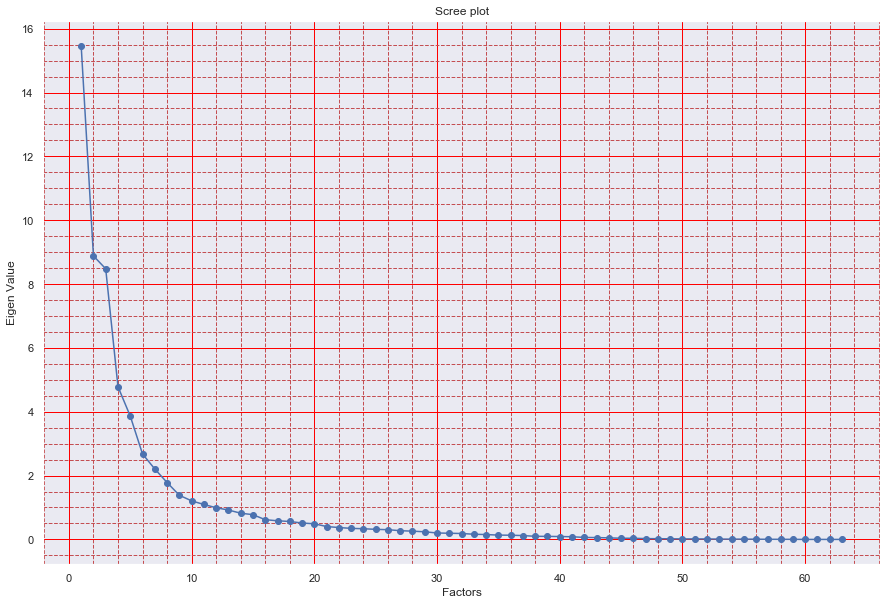

In [90]:
sns.set()
plt.figure(figsize = (15,10))
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'red', )
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.minorticks_on()
plt.show()

In [91]:
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = fa_train_df.columns
Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
rent_mean                    0.741443  0.044287 -0.352368  0.153509  0.116736   
rent_median                  0.698518  0.046981 -0.346568  0.134434  0.103098   
rent_stdev                   0.569264  0.004665 -0.238085  0.201896  0.181388   
rent_sample_weight          -0.448238  0.393742 -0.132826 -0.035291  0.189165   
rent_samples                -0.176668  0.515751 -0.332828  0.010131  0.310741   
rent_gt_10                  -0.073270  0.139575 -0.242411  0.294140 -0.189056   
rent_gt_15                  -0.136913  0.160458 -0.382011  0.507516 -0.225363   
rent_gt_20                  -0.230503  0.126006 -0.416702  0.608741 -0.188459   
rent_gt_25                  -0.292941  0.105674 -0.434843  0.691220 -0.165812   
rent_gt_30                  -0.314696  0.090270 -0.421206  0.704182 -0.143304   
rent_gt_35                  -0.308384  0.073408 -0.411819  0.707504 -0.117811   
rent_gt_40                  -0.304622  0.061899 -0.403404  0.694750 -0.104095   
rent_gt_50                  -0.277726  0.035154 -0.370608  0.603533 -0.068557   
hi_mean                      0.947868 -0.019905 -0.029490 -0.040766  0.102480   
hi_median                    0.914955 -0.003121 -0.025911 -0.083753  0.065246   
hi_stdev                     0.891885 -0.060687 -0.030842  0.096174  0.189974   
hi_sample_weight            -0.276433  0.797465  0.272900  0.155364  0.082937   
hi_samples                   0.217709  0.867182  0.271447  0.113176  0.118081   
family_mean                  0.951226 -0.059714 -0.008027  0.000029  0.139924   
family_median                0.928524 -0.059137 -0.010590 -0.014041  0.137781   
family_stdev                 0.825302 -0.058440 -0.029899  0.105478  0.182033   
family_sample_weight        -0.252572  0.835568  0.293361  0.109011  0.015287   
family_samples               0.281559  0.861768  0.315510  0.079789  0.030472   
hc_mortgage_mean             0.796550 -0.036873 -0.376319  0.169248  0.262869   
hc_mortgage_median           0.776684 -0.035555 -0.387217  0.160381  0.262270   
hc_mortgage_stdev            0.698710 -0.072199 -0.145069  0.193673  0.206703   
hc_mortgage_sample_weight    0.033252  0.656974  0.522449 -0.046848 -0.228184   
hc_mortgage_samples          0.499051  0.684989  0.301343  0.007979 -0.151223   
hc_mean                      0.723214 -0.089528 -0.283843  0.166141  0.307328   
hc_median                    0.691341 -0.082168 -0.285170  0.153918  0.297270   
hc_stdev                     0.559636 -0.090899 -0.116652  0.198892  0.299718   
hc_samples                   0.059998  0.358946  0.756222  0.248580  0.090137   
hc_sample_weight            -0.148103  0.338616  0.771422  0.189060  0.033243   
home_equity_second_mortgage  0.164308  0.168522 -0.278496 -0.143687 -0.606676   
second_mortgage              0.186987  0.167969 -0.302800 -0.133310 -0.628394   
home_equity                  0.587467  0.100402 -0.275668 -0.046764 -0.510395   
debt                         0.476148  0.310536 -0.463936 -0.216486 -0.349606   
second_mortgage_cdf         -0.312508 -0.189913  0.117885  0.096137  0.587927   
home_equity_cdf             -0.634662 -0.115193  0.223311  0.030580  0.507794   
debt_cdf                    -0.468956 -0.315860  0.502848  0.227167  0.319996   
hs_degree                    0.687147 -0.030971  0.207535 -0.079299 -0.137511   
hs_degree_male               0.672691 -0.021046  0.173450 -0.072623 -0.116537   
hs_degree_female             0.645020 -0.040963  0.224753 -0.078052 -0.138952   
male_age_mean                0.303367 -0.362048  0.613304  0.392455 -0.081222   
male_age_median              0.373367 -0.338704  0.617617  0.363566 -0.114510   
male_age_stdev               0.091878 -0.127250  0.501662  0.249314 -0.178157   
male_age_sample_weight       0.103332  0.838504  0.037753  0.021867  0.176557   
male_age_samples             0.168723  0.909578  0.119239  0.035777  0.143300   
female_age_mean              0.242114 -0.352720  0.597347  0

In [92]:
fa = FactorAnalyzer( rotation="varimax", n_factors = 12)
fa.fit(fa_train_df)
loadings = fa.loadings_

In [93]:
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = fa_train_df.columns
Factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
rent_mean                    0.753434  0.038773 -0.016183  0.048511  0.095743   
rent_median                  0.707868  0.036718 -0.029542  0.039594  0.075670   
rent_stdev                   0.649667  0.023284  0.051481  0.092300  0.064313   
rent_sample_weight          -0.287026  0.251960 -0.163092  0.037073 -0.099887   
rent_samples                 0.028971  0.342474 -0.196313  0.051565 -0.077693   
rent_gt_10                  -0.032001  0.045607 -0.040913  0.211719  0.002985   
rent_gt_15                  -0.012892  0.030900 -0.054326  0.378194 -0.041977   
rent_gt_20                  -0.035942  0.001931 -0.047057  0.586308 -0.104764   
rent_gt_25                  -0.055696 -0.010649 -0.047592  0.745539 -0.136844   
rent_gt_30                  -0.067221 -0.012240 -0.053790  0.865602 -0.131458   
rent_gt_35                  -0.058155 -0.017412 -0.058520  0.938066 -0.113489   
rent_gt_40                  -0.057306 -0.024005 -0.063761  0.942163 -0.101295   
rent_gt_50                  -0.043709 -0.043649 -0.069544  0.833940 -0.094527   
hi_mean                      0.817989  0.077412  0.063380 -0.200531  0.275701   
hi_median                    0.757467  0.085201  0.037801 -0.221920  0.259832   
hi_stdev                     0.849087  0.046872  0.125504 -0.093282  0.279411   
hi_sample_weight            -0.295513  0.802442  0.068856  0.058209 -0.017308   
hi_samples                   0.108105  0.921029  0.077029 -0.052238  0.140828   
family_mean                  0.834148  0.045904  0.112263 -0.174347  0.367662   
family_median                0.808064  0.042952  0.092702 -0.174773  0.354424   
family_stdev                 0.776970  0.035470  0.142352 -0.077223  0.313645   
family_sample_weight        -0.288866  0.863512 -0.023473  0.034248 -0.190570   
family_samples               0.130547  0.948768  0.019192 -0.073460  0.040456   
hc_mortgage_mean             0.934330 -0.022950  0.012469  0.004515 -0.012721   
hc_mortgage_median           0.916386 -0.028380 -0.006251  0.008968 -0.018016   
hc_mortgage_stdev            0.769961  0.003348  0.154152 -0.020602  0.047693   
hc_mortgage_sample_weight   -0.292820  0.751985  0.121467 -0.101719  0.212251   
hc_mortgage_samples          0.204684  0.766316  0.077439 -0.104053  0.243743   
hc_mean                      0.855199 -0.055298  0.027487 -0.015686  0.059145   
hc_median                    0.817808 -0.054489  0.013138 -0.013540  0.057790   
hc_stdev                     0.695125 -0.014767  0.115063 -0.004816  0.027525   
hc_samples                  -0.085941  0.628523  0.386202 -0.067318  0.110005   
hc_sample_weight            -0.295739  0.579381  0.343354 -0.059449  0.058440   
home_equity_second_mortgage  0.024772  0.019748 -0.085183  0.003958 -0.006066   
second_mortgage              0.054594  0.013895 -0.082288  0.014823 -0.014968   
home_equity                  0.351789  0.020436  0.004946 -0.023988  0.149955   
debt                         0.282547  0.113226 -0.181184 -0.017058  0.113855   
second_mortgage_cdf         -0.086070 -0.105965 -0.007377  0.019379 -0.117894   
home_equity_cdf             -0.373698 -0.050268 -0.040173  0.027974 -0.210093   
debt_cdf                    -0.296751 -0.111086  0.221517  0.015952 -0.087603   
hs_degree                    0.316775  0.033685  0.198803 -0.159406  0.877248   
hs_degree_male               0.334030  0.036935  0.183171 -0.153294  0.806307   
hs_degree_female             0.288963  0.032686  0.211754 -0.164414  0.806427   
male_age_mean                0.123308 -0.070692  0.906100 -0.067325  0.118236   
male_age_median              0.159381 -0.040221  0.881823 -0.090297  0.121441   
male_age_stdev              -0.026368  0.038021  0.329153 -0.029212  0.034599   
male_age_sample_weight       0.092445  0.815711 -0.208624  0.033648  0.005761   
male_age_samples             0.123273  0.920323 -0.138925 -0.017461 -0.037242   
female_age_mean              0.075913 -0.078574  0.886061 -0

In [94]:
#  • Highschool graduation rates
#                         • Median population age
#                         • Second mortgage statistics
#                         • Percent own
#                         • Bad debt expense

Factors_df = round(Factors.loc[['hs_degree', 'hs_degree_male', 'hs_degree_female',"male_age_median", "female_age_median", "home_equity_second_mortgage", 'second_mortgage', 'second_mortgage_cdf', 'pct_own', 'Bad_Debt'], :], 2)

def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.6:
    color = 'red'
  elif value > 0.6:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [95]:
Factors_df.style.applymap(color_negative_red)

In [96]:
len(fa_train_df.columns)

63

In [97]:
# Get variance of each factors
fact_variance  = fa.get_factor_variance()
fact_variance

(array([11.65257444,  8.60163377,  5.49200486,  4.72430681,  3.81229937,
         3.44811228,  2.97365642,  2.83457696,  2.39444141,  1.8196726 ,
         1.73720416,  1.02493561]),
 array([0.1849615 , 0.13653387, 0.08717468, 0.074989  , 0.06051269,
        0.05473194, 0.0472009 , 0.04499329, 0.03800701, 0.02888369,
        0.02757467, 0.01626882]),
 array([0.1849615 , 0.32149537, 0.40867005, 0.48365905, 0.54417173,
        0.59890367, 0.64610457, 0.69109786, 0.72910486, 0.75798855,
        0.78556322, 0.80183204]))

In [98]:
Factor_variance  = pd.DataFrame.from_records(fact_variance)

Factor_variance = Factor_variance.add_prefix('Factor ')

Factor_variance.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
round(Factor_variance, 2)

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
SS Loadings        11.65      8.60      5.49      4.72      3.81      3.45   
Proportion Var      0.18      0.14      0.09      0.07      0.06      0.05   
Cumulative Var      0.18      0.32      0.41      0.48      0.54      0.60   

                Factor 6  Factor 7  Factor 8  Factor 9  Factor 10  Factor 11  
SS Loadings         2.97      2.83      2.39      1.82       1.74       1.02  
Proportion Var      0.05      0.04      0.04      0.03       0.03       0.02  
Cumulative Var      0.65      0.69      0.73      0.76       0.79       0.80

## Data Modeling :

### 1. Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. Please refer ‘deplotment_RE.xlsx’. Column hc_mortgage_mean is predicted variable. This is the mean monthly     mortgage and owner costs of specified geographical location. Note: Exclude loans from prediction model which have NaN (Not a Number) values for hc_mortgage_mean.

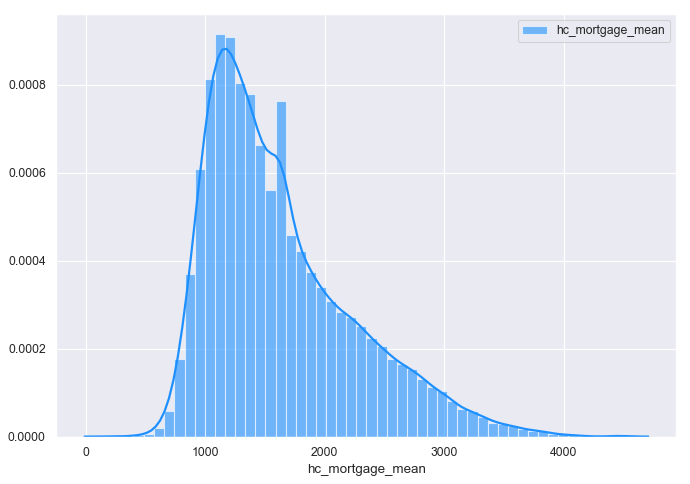

In [99]:
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df_train.hc_mortgage_mean, color="dodgerblue", label="hc_mortgage_mean", **kwargs)
plt.legend();

### a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step

In [118]:
cat_variables(df_train)

['COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'primary',
 'zip_code',
 'area_code',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'universe_samples',
 'used_samples',
 'male_population_bracket',
 'female_population_bracket']

In [120]:
df_train.drop(['COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'primary',
 'zip_code',
 'area_code',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'universe_samples',
 'used_samples',
 'male_population_bracket',
 'female_population_bracket'], axis=1, inplace=True)

In [128]:
print(df_train.shape,df_test.shape)

(27321, 66) (11709, 63)


In [124]:
df_test.drop(['COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'primary',
 'zip_code',
 'area_code',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'universe_samples',
 'used_samples'], axis=1, inplace=True)

In [143]:
b= df_test.columns
for i in df_train.columns:
    if i not in b:
        print(i)

bad_debt
Good_Debt
remaining_income


In [146]:
df_train.drop(['bad_debt',
'Good_Debt',
'remaining_income'], axis=1, inplace=True)

In [148]:
test_y = df_test['hc_mortgage_mean']

In [150]:
df_test.drop(['hc_mortgage_mean'], axis=1, inplace=True)

In [151]:
print(df_train.shape,df_test.shape)

(27321, 63) (11709, 62)


In [152]:
train_X = df_train.drop(columns=['hc_mortgage_mean'])
train_y = df_train['hc_mortgage_mean']

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
lr = LinearRegression()
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

def adj_rsqrd(df, r2):
        # adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
    # k = number of predictors = data.shape[1] - 1
    adj_rsqrd = 1 - (1-r2)*(len(df) - 1) / (len(df) - (df.shape[1] - 1) - 1)
    return round(adj_rsqrd, 3)

In [155]:
lr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
predict_train = lr.predict(train_X)
predict_test = lr.predict(df_test)
# model evaluation for testing set

mae = mean_absolute_error(test_y, predict_test)
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(df_test, r2)))

The model performance for test set
--------------------------------------
MAE is 44.178
MSE is 4987.885
RMSE is 70.625
R2 score is 0.987
Adjusted R2 score is 0.987


Regression Model with all dependent numeric variables @ Country level is giving R SQUARED metric of 98.8%. So skipping state level Regression Model

## Testing randomly

In [165]:
import random
randomlist = []
for i in range(0,100):
    n = random.randint(1,len(df_test))
    randomlist.append(n)
print(randomlist)

[1487, 797, 8430, 9691, 966, 8391, 6589, 3284, 26, 1497, 9937, 4794, 3967, 1371, 3328, 6078, 7474, 8942, 8938, 3647, 7198, 368, 11116, 106, 1018, 2254, 9024, 2993, 2251, 4694, 2523, 30, 1870, 4871, 1039, 10875, 11544, 10660, 5870, 8454, 10653, 10168, 5587, 11517, 9340, 7793, 10375, 1855, 5525, 6041, 5009, 2333, 4772, 124, 1785, 4874, 1423, 4331, 7392, 1829, 11671, 1970, 5981, 4808, 10068, 4612, 5679, 2523, 11376, 9919, 2175, 11354, 1523, 11186, 5495, 624, 3302, 2614, 9762, 10966, 1719, 4464, 1972, 2841, 3477, 153, 4654, 6048, 5550, 3236, 7908, 10338, 10047, 4179, 3158, 4457, 8488, 2252, 1752, 144]


In [166]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(df_test.iloc[i])]
    pre_data_out = lr.predict(data_in)
    data_out = test_y .iloc[i]
    
    print(i, pre_data_out, data_out)
    
    pre_out.append(pre_data_out)
    out.append(data_out)

1487 [1537.252943] 1538.9271099999999
797 [1100.1873983] 1123.9778199999998
8430 [1034.89372497] 1045.62602
9691 [829.61480118] 821.04407
966 [3781.67428946] 3191.85355
8391 [894.05563978] 896.7646900000001
6589 [1389.26784388] 1347.51664
3284 [769.67274418] 791.22509
26 [1148.23292959] 1216.33145
1497 [1717.32588294] 1706.18744
9937 [1282.2516492] 1248.09451
4794 [1726.0766296] 1665.71719
3967 [1063.70109138] 1083.68236
1371 [2019.07934032] 2105.5010399999996
3328 [1695.43035896] 1636.6353900000001
6078 [2282.03209683] 2233.35794
7474 [2672.35602207] 2647.88413
8942 [1240.3986675] 1250.11167
8938 [2600.33812169] 2728.97683
3647 [1481.60540004] 1491.36826
7198 [872.99645744] 906.59185
368 [3202.14678469] 3109.5888800000002
11116 [1059.6464401] 1077.61599
106 [1213.18723223] 1200.83771
1018 [2328.58656595] 2283.04295
2254 [2019.93038874] 1907.81628
9024 [2048.58536651] 2249.5
2993 [1477.13225878] 1463.63703
2251 [873.5297137] 837.9608
4694 [2335.10765207] 2384.9916399999997
2523 [1467.3